In [29]:

import numpy as np
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio.v3 as iio
import skimage.color
import skimage.filters
import skimage.measure
import glob
import os
import skimage.exposure as skie
from PIL import Image 
import pandas as pd
import openpyxl


In [30]:
#show function

def show(img):
    # Display the image.
    fig, (ax1, ax2) = plt.subplots(1, 2,
                                   figsize=(12, 3))

    ax1.imshow(img, cmap=plt.cm.gray)
    ax1.set_axis_off()
    ax1.set_title('Original Image')

    # Display the histogram.
    ax2.hist(img.ravel(), lw=0, bins=256)
    ax2.set_xlim(0, img.max())
    ax2.set_yticks([])
    ax2.set_title('Histogram')
    y, x, _ = plt.hist(img.ravel(), lw=0, bins=255, range =[0,240])
    xmax= x[np.where(y == y.max())]
    ax2.set_xlabel("X value when y is at max: " + str(xmax))

    plt.show()
    return xmax

In [31]:
#blob finder function
def BlobFinder(image):
    # Set up the SimpleBlobdetector with default parameters.
    params = cv2.SimpleBlobDetector_Params()

    # # Define thresholds
    # #Can define thresholdStep. See documentation. 
    params.minThreshold = 100
    params.maxThreshold = 255

    # Filter by Area.
    params.filterByArea = True
    params.minArea = 10000
    params.maxArea = 350000

    # Filter by Color (Use blobColor = 0 to extract dark blobs and blobColor = 255 to extract light blobs)
    params.filterByColor = True
    params.blobColor = 0

    # Filter by Circularity circl =1 square=0.78
    params.filterByCircularity = False
    params.minCircularity = 0.2
    params.maxCircularity = 1

    # Filter by Convexity
    params.filterByConvexity = False
    params.minConvexity = 0.4
    params.maxConvexity = 1

 # Filter by InertiaRatio
    params.filterByInertia = False
    params.minInertiaRatio = 0
    params.maxInertiaRatio = 0.9

    # Distance Between Blobs
    params.minDistBetweenBlobs = 0

    # Setup the detector with parameters
    detector = cv2.SimpleBlobDetector_create(params)
   
    keypoints = detector.detect(image)
    

    return keypoints

In [32]:
#binarization function
def Binarization(img,x_max_at_y):

     # Display the image.
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
    # image = cv2.cvtColor(img, 50,50,50)
    blur = cv2.bilateralFilter(img,100,100,100)
    
    ax1.imshow(blur, cmap=plt.cm.gray)
    ax1.set_axis_off()
    ax1.set_title('Blurred Image Using Bilaterial Filtering')
    

    if x_max_at_y > 100:
        th_og, img_og = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        type="Otsus Thresholding Technique 1"
        
    elif x_max_at_y < 100 and x_max_at_y > 30 :
        th_og, img_og = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
        type="Otsus Thresholding Technique 2"
    else:
        th_og, img_og = cv2.threshold(blur,0,15,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
        type="Otsus Thresholding Technique 3"
        
    ax2.imshow(img_og,'gray')
    ax2.xaxis.set_label_position('top')
    ax2.set_title(type)

    keypoints = BlobFinder(img_og)
    img_with_blobs = cv2.drawKeypoints(img_og, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    print(keypoints)
    ax3.imshow(img_with_blobs)
    detected_blob_count= str(len(keypoints))
    ax3.set_title('Blob Detector')
    ax3.set_xlabel("Number of blobs detected are: " + detected_blob_count )

    plt.tight_layout()
    plt.show()
    return (detected_blob_count)


In [33]:
def threshold_trunc(images):
    gray_image = cv2.imread(images, 0)
    threshold_value = 120   
    max_val = 255
    ret, gray_image_thresh = cv2.threshold(gray_image, threshold_value, max_val, cv2.THRESH_TRUNC)
    # img = cv2.imread(images, 0)
    blur = cv2.bilateralFilter(gray_image_thresh,100,100,100)
    return gray_image, blur


In [34]:
def results_to_dataframe(df,filename, detected_value):    
    df = df.append({'Filename':filename, 'Number of Eggs Detected':detected_value}, ignore_index=True)
    return(df)

20230407-ca-metal-brightwhite-0deg-10kus.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230407-ca-metal-brightwhite-0deg-10kus.tif
[[128 122 119 ... 126 124 125]
 [122 123 125 ... 123 119 125]
 [118 122 128 ... 122 122 121]
 ...
 [121 117 118 ... 126 128 128]
 [119 122 119 ... 129 130 127]
 [119 119 117 ... 125 125 129]]


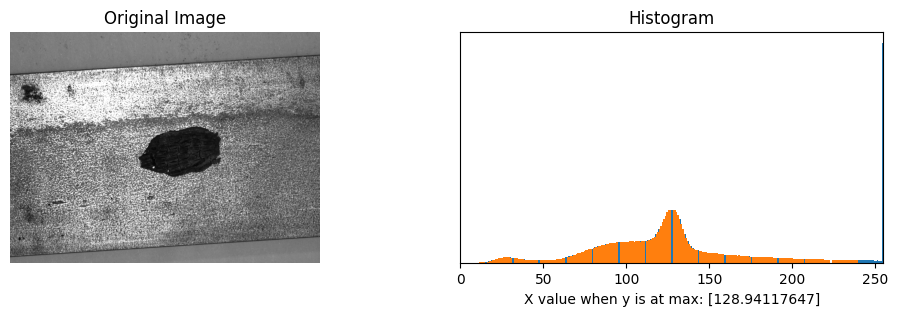

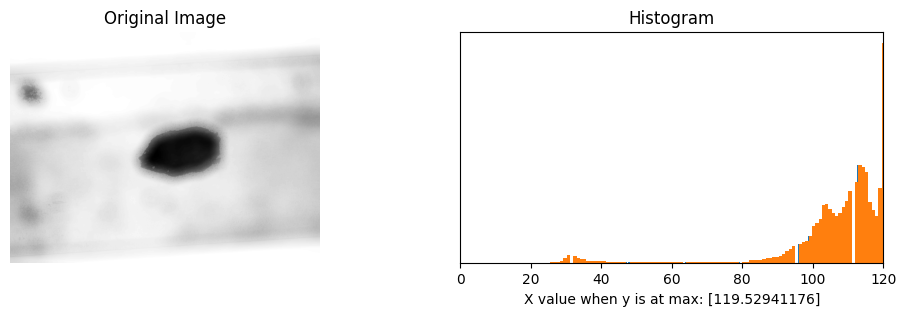

(< cv2.KeyPoint 000002641671C030>,)


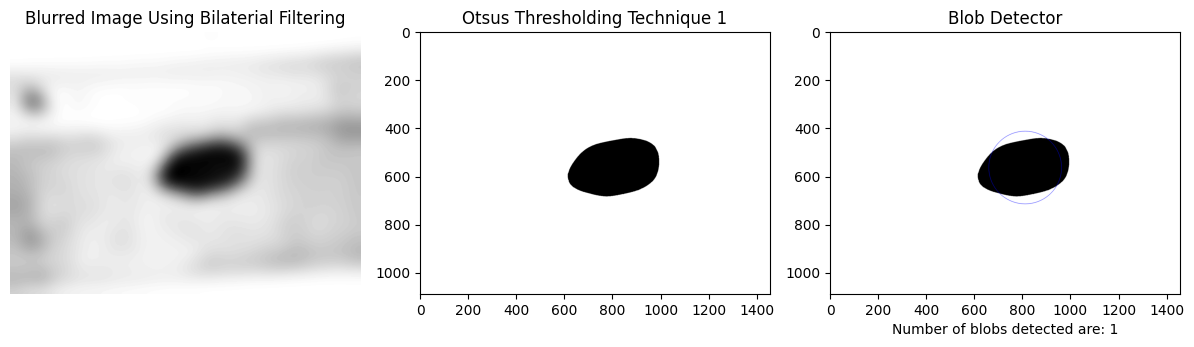

20230407-cb-metal-brightwhite-0deg-1kus.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230407-cb-metal-brightwhite-0deg-1kus.tif
[[107 109 107 ... 104 108 101]
 [103 115 108 ... 105 104 117]
 [109 102 112 ... 113  98 109]
 ...
 [104 106  99 ... 115 105 113]
 [110 110 108 ... 108 109 110]
 [106 108  99 ... 109 119 115]]


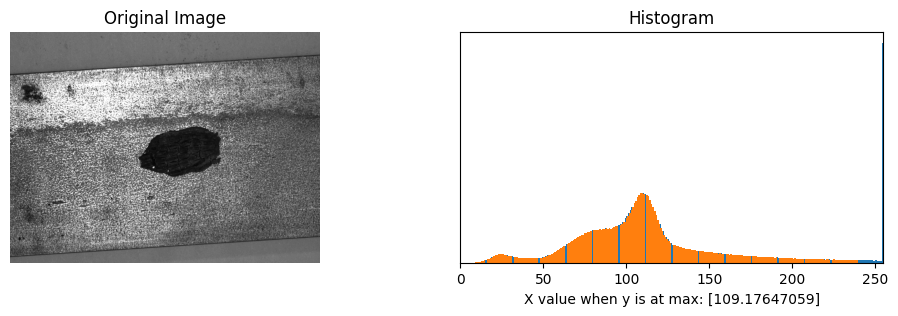

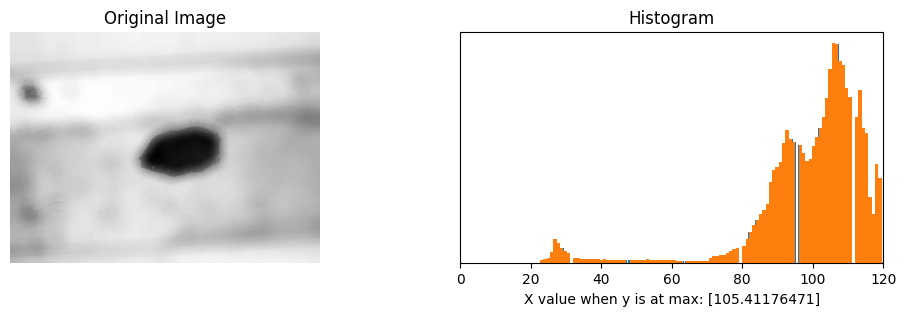

(< cv2.KeyPoint 000002641615E960>,)


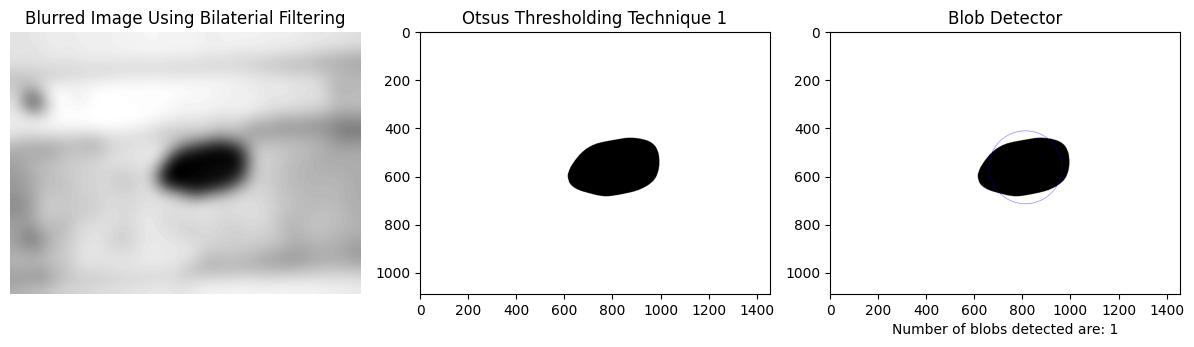

20230407-ga-bark-brightwhite-0deg-50kus.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230407-ga-bark-brightwhite-0deg-50kus.tif
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


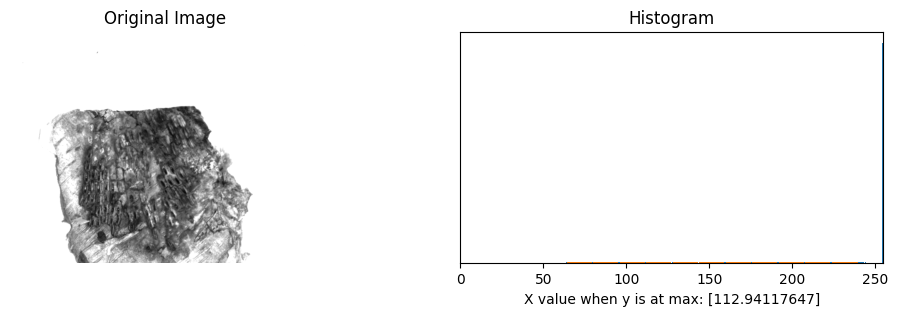

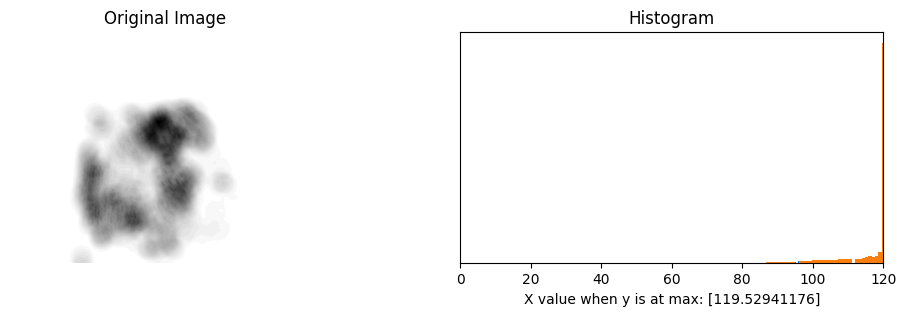

()


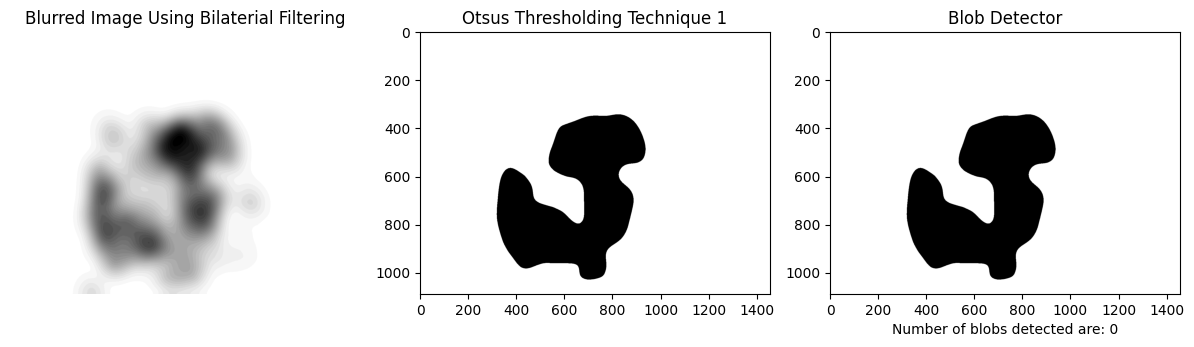

20230407-gb-bark-brightwhite-0deg-10kus.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230407-gb-bark-brightwhite-0deg-10kus.tif
[[135 145 142 ... 170 183 177]
 [132 130 148 ... 179 173 167]
 [152 138 145 ... 166 151 142]
 ...
 [159 166 170 ... 139 129 119]
 [152 176 175 ... 156 140 139]
 [145 154 162 ... 152 142 127]]


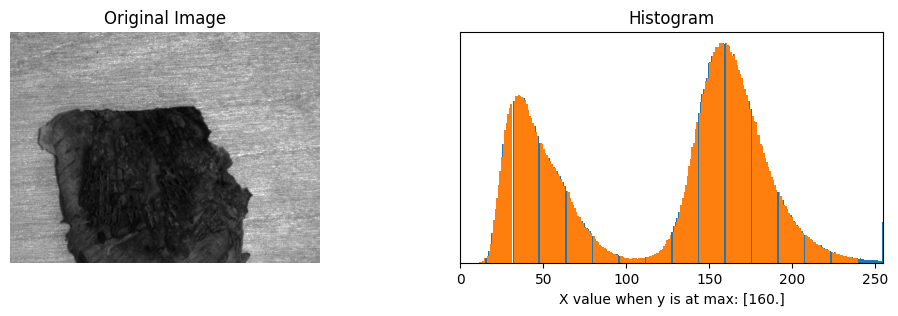

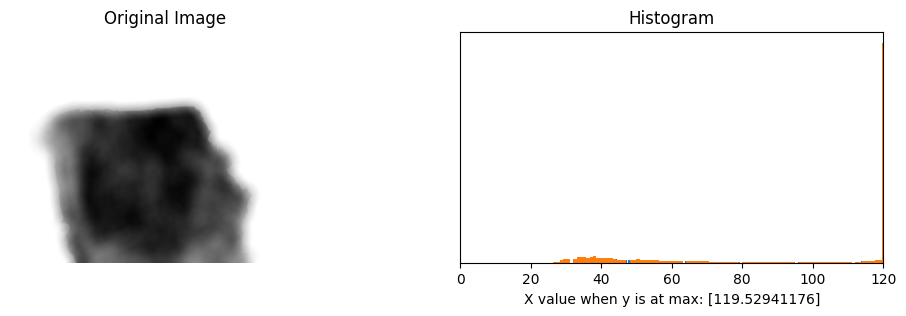

()


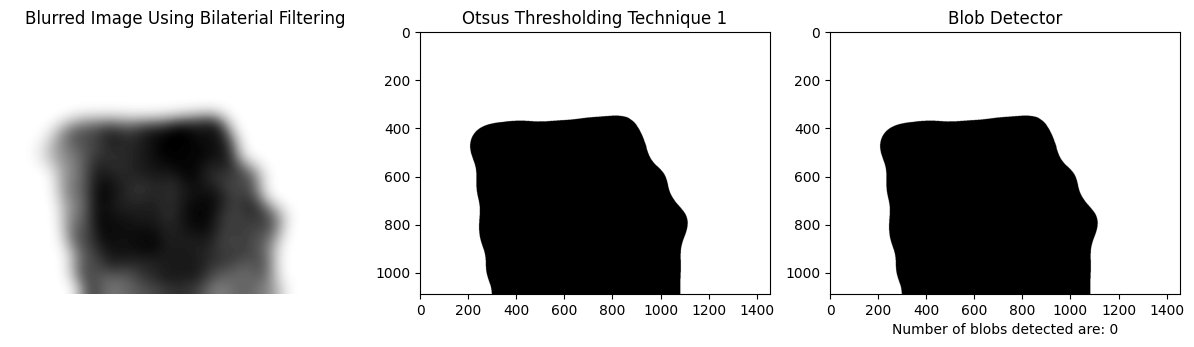

20230407-gc-bark-brightwhite-0deg-1kus.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230407-gc-bark-brightwhite-0deg-1kus.tif
[[133 137 138 ... 155 187 170]
 [142 127 157 ... 186 170 153]
 [151 136 144 ... 155 144 142]
 ...
 [166 157 162 ... 151 125 111]
 [159 172 185 ... 161 142 133]
 [131 169 143 ... 153 146 129]]


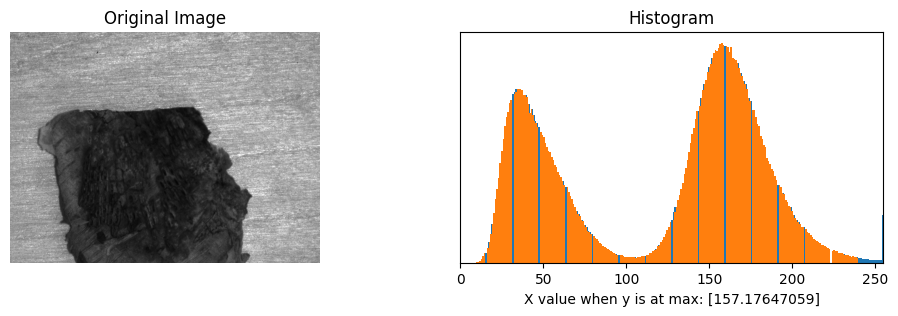

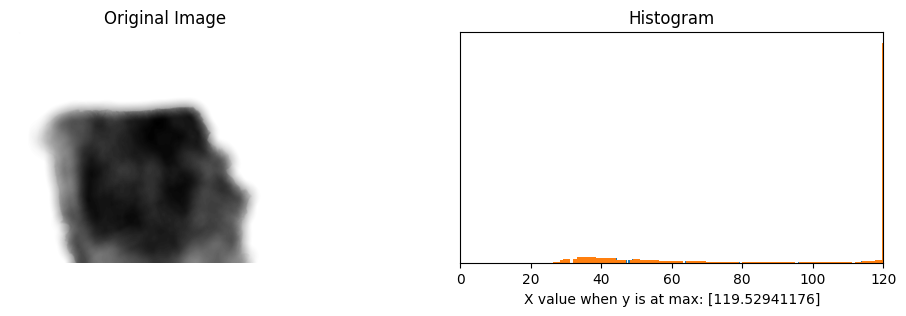

()


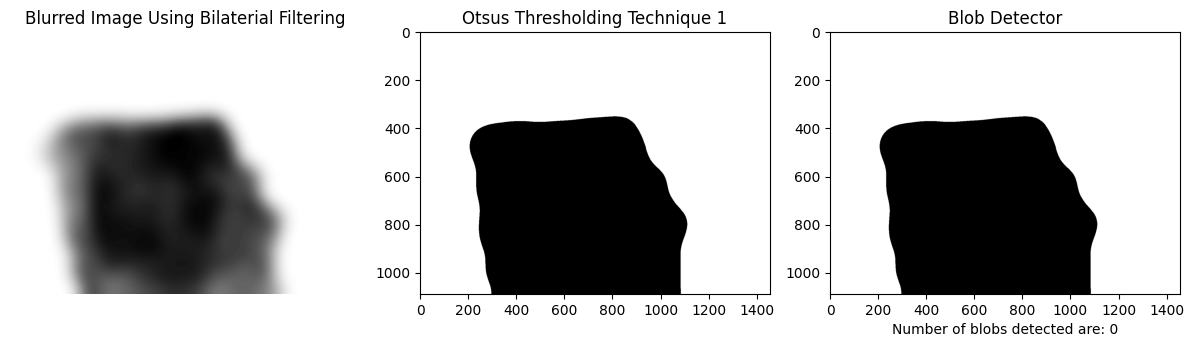

20230418-aa-metal-controled-white-0deg-150kus-sample_A13.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230418-aa-metal-controled-white-0deg-150kus-sample_A13.tif
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


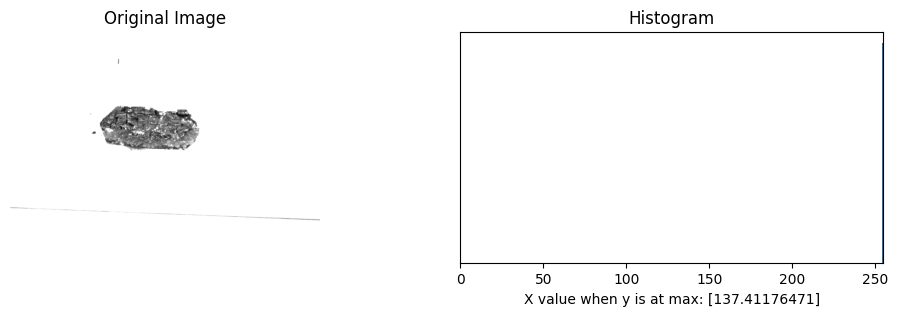

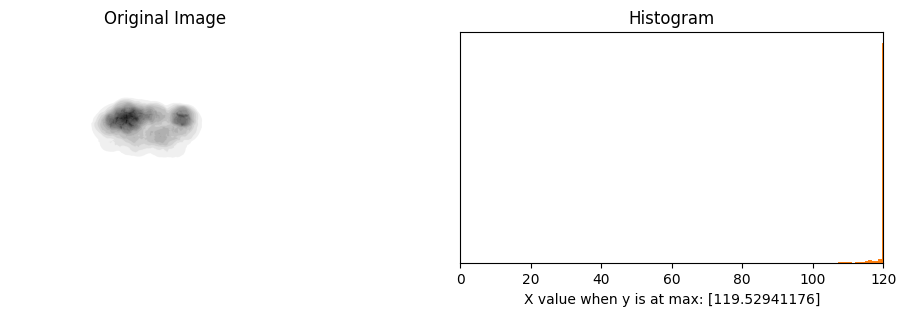

(< cv2.KeyPoint 00000264147F2DB0>,)


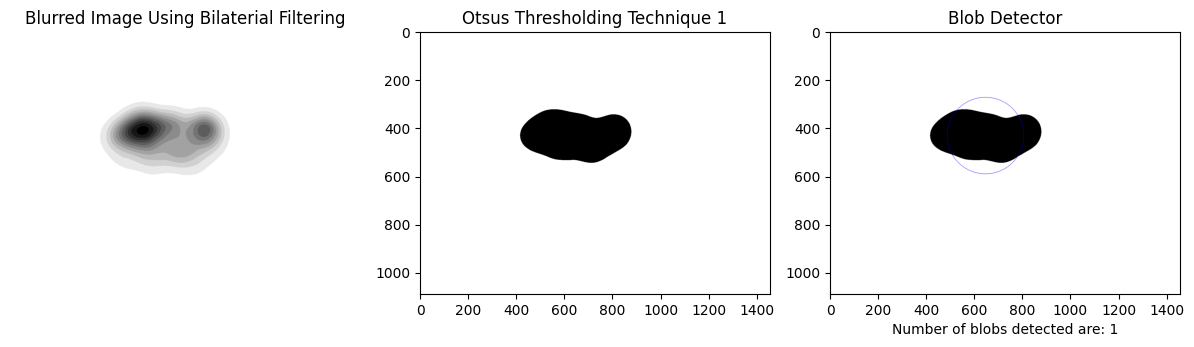

20230418-aa-metal-controled-white-0deg-150kus-sample_B13.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230418-aa-metal-controled-white-0deg-150kus-sample_B13.tif
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


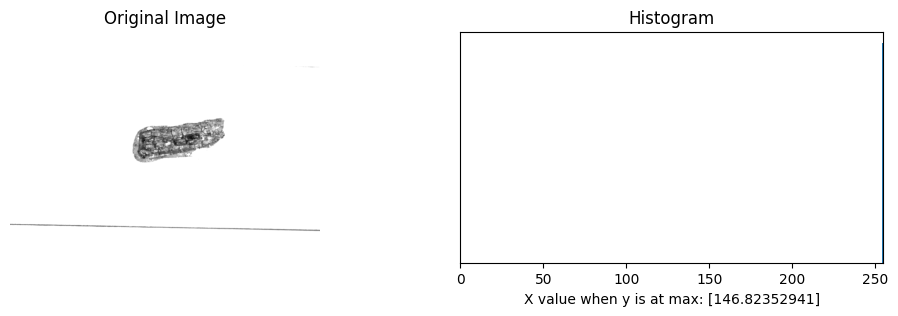

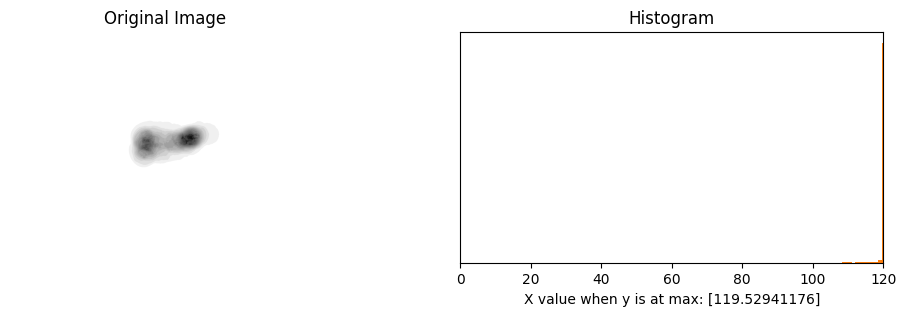

(< cv2.KeyPoint 0000026415911180>,)


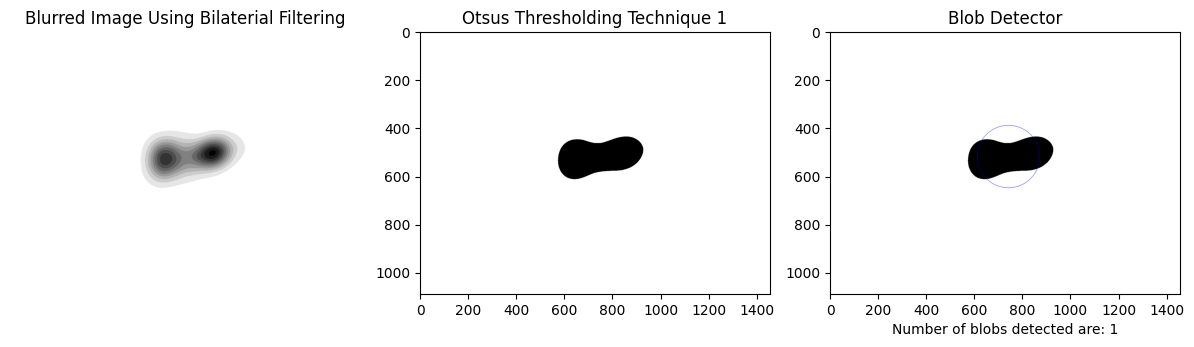

20230418-aa-metal-controled-white-0deg-50kus-sample_A13.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230418-aa-metal-controled-white-0deg-50kus-sample_A13.tif
[[255 255 235 ... 195 183 188]
 [255 255 235 ... 197 188 186]
 [243 244 244 ... 213 208 222]
 ...
 [211 217 218 ... 169 159 161]
 [206 211 206 ... 173 175 157]
 [201 199 214 ... 185 173 168]]


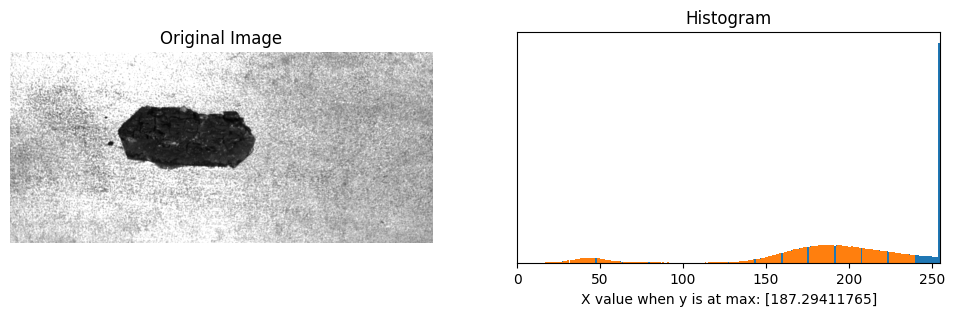

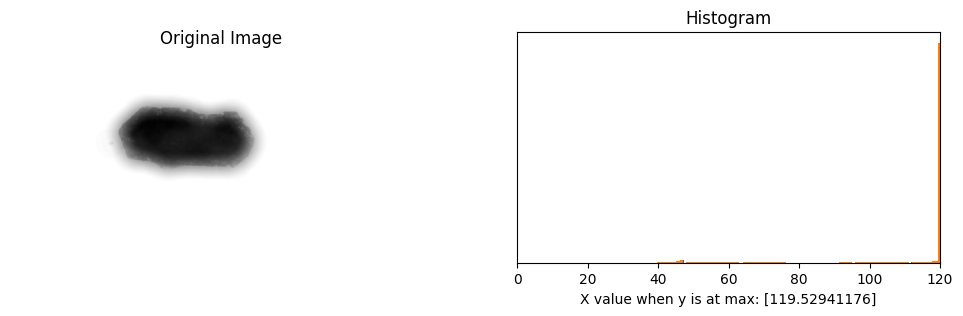

(< cv2.KeyPoint 00000264147CD900>,)


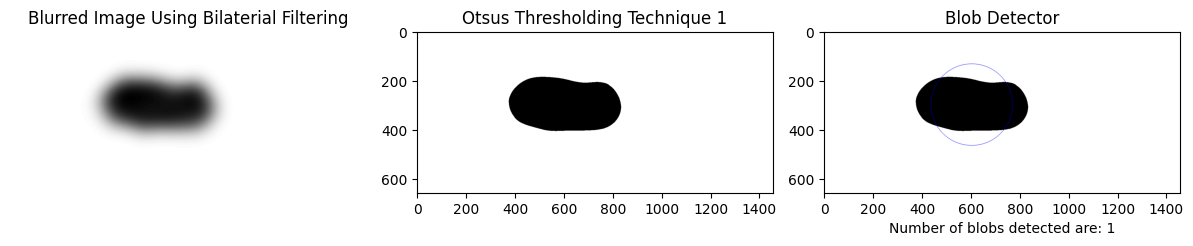

20230418-aa-metal-controled-white-0deg-50kus-sample_B13.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230418-aa-metal-controled-white-0deg-50kus-sample_B13.tif
[[142 142 139 ... 113 113 113]
 [138 139 135 ... 116 117 116]
 [135 141 141 ... 120 114 114]
 ...
 [121 124 123 ... 124 123 123]
 [120 122 122 ... 121 126 120]
 [120 121 124 ... 125 120 120]]


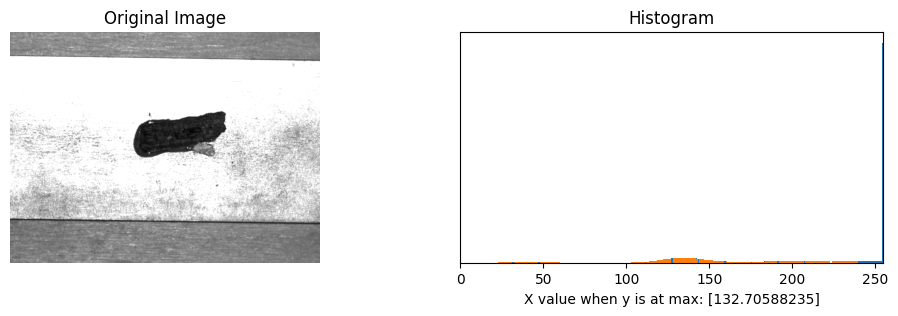

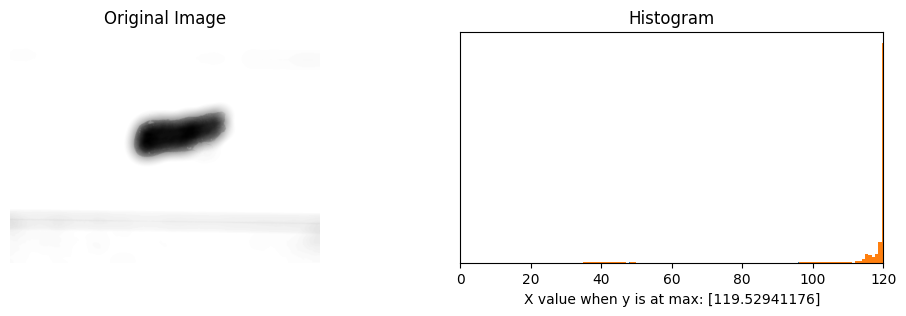

(< cv2.KeyPoint 000002641586E600>,)


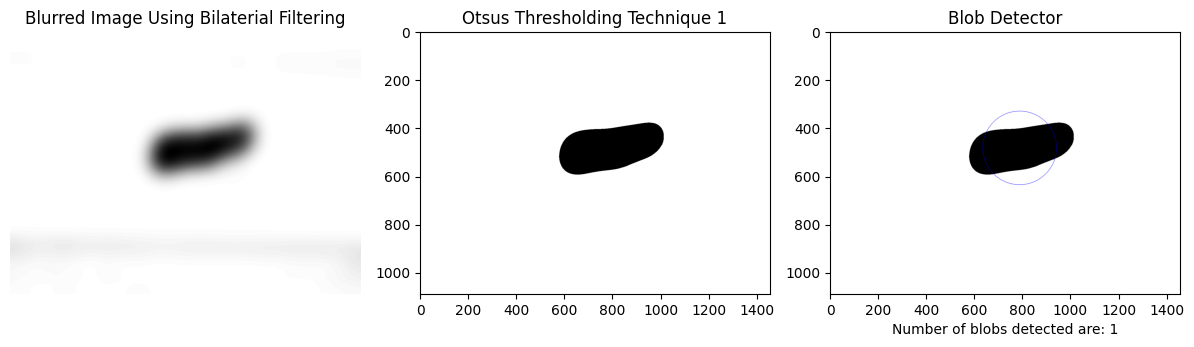

20230418-ab-metal-controled-white-0deg-100kus-sample_B13.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230418-ab-metal-controled-white-0deg-100kus-sample_B13.tif
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


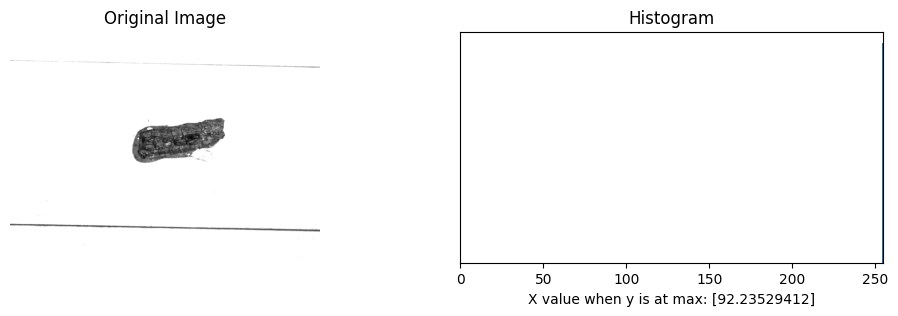

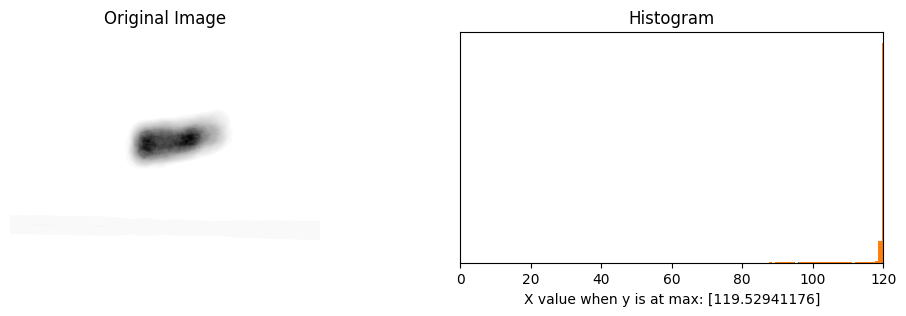

(< cv2.KeyPoint 0000026415E0B2D0>,)


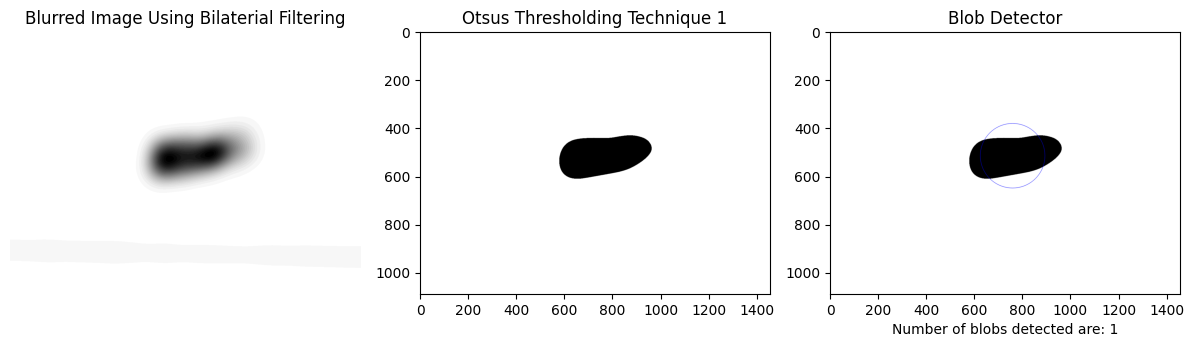

20230418-ab-metal-controled-white-0deg-30kus-sample_A13.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230418-ab-metal-controled-white-0deg-30kus-sample_A13.tif
[[ 96  99  94 ...  96  96 101]
 [ 97  93  94 ...  95  95  99]
 [ 98  94  96 ...  95  93  93]
 ...
 [ 94  95  98 ...  99  97  94]
 [ 98  98 105 ...  99  98  93]
 [102  98 104 ...  98  94  95]]


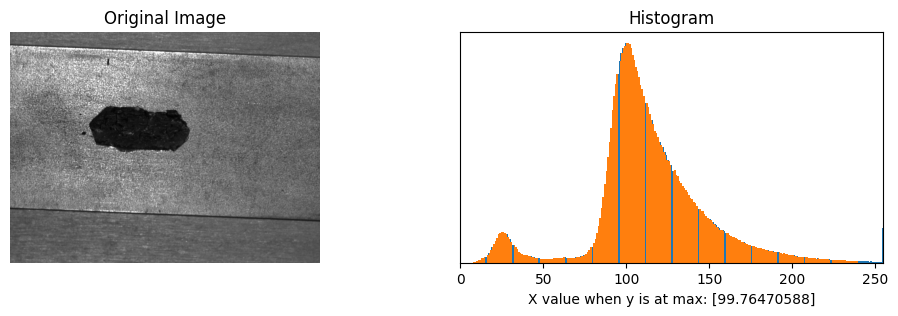

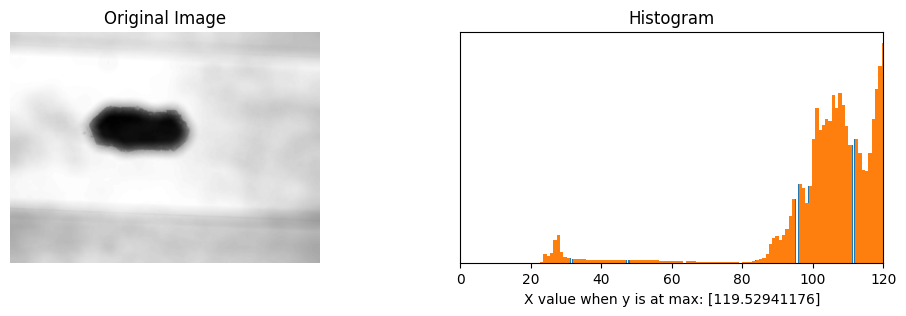

(< cv2.KeyPoint 0000026416BE37E0>,)


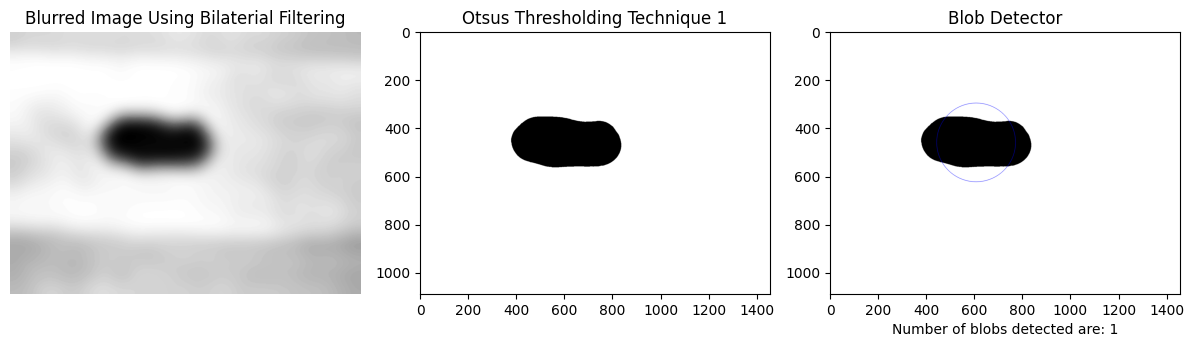

20230418-ab-metal-controled-white-0deg-30kus-sample_B13.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230418-ab-metal-controled-white-0deg-30kus-sample_B13.tif
[[86 85 84 ... 72 71 71]
 [81 87 84 ... 69 70 68]
 [80 87 85 ... 73 70 70]
 ...
 [73 75 73 ... 74 72 72]
 [71 73 75 ... 76 78 73]
 [73 73 75 ... 75 74 73]]


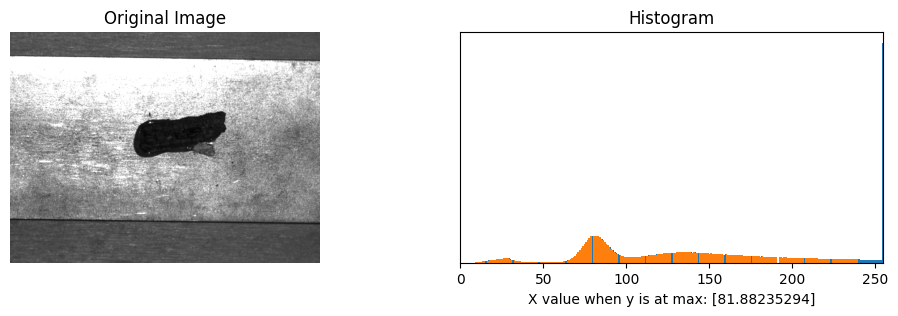

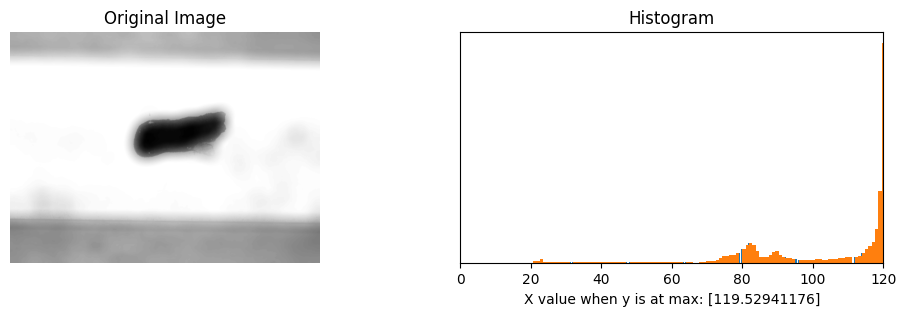

(< cv2.KeyPoint 0000026416BFEA50>,)


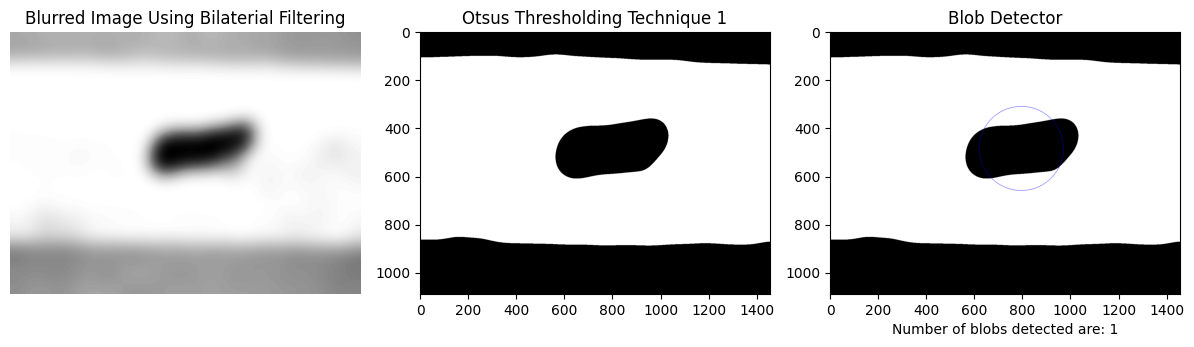

20230418-ac-metal-controled-white-0deg-10kus-sample_A13.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230418-ac-metal-controled-white-0deg-10kus-sample_A13.tif
[[31 31 31 ... 31 32 32]
 [32 30 30 ... 29 30 32]
 [31 31 30 ... 29 31 31]
 ...
 [30 31 33 ... 34 31 31]
 [30 31 31 ... 32 30 29]
 [31 31 33 ... 31 31 31]]


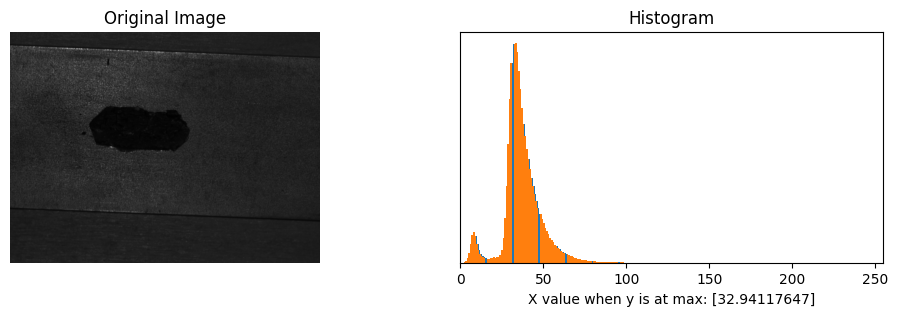

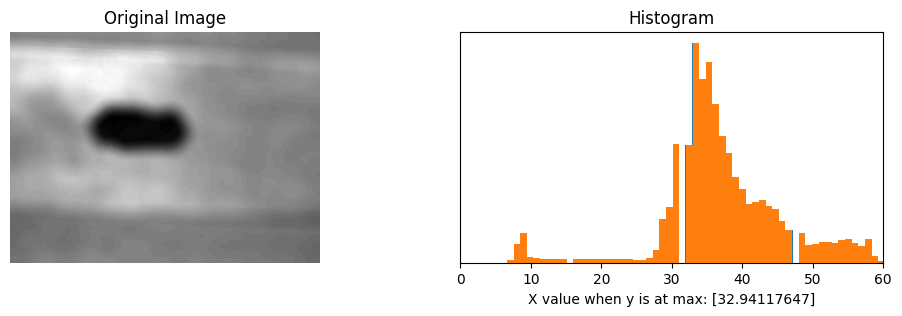

()


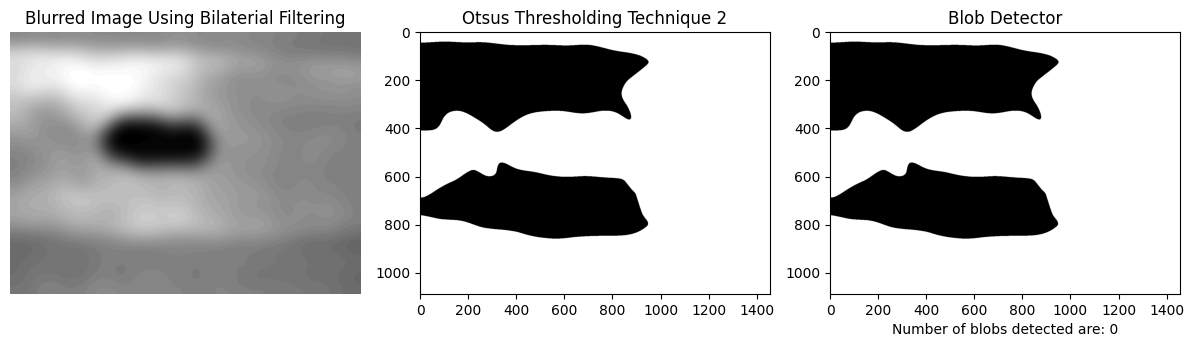

20230418-ac-metal-controled-white-0deg-10kus-sample_B13.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230418-ac-metal-controled-white-0deg-10kus-sample_B13.tif
[[29 27 26 ... 23 22 22]
 [27 28 28 ... 22 21 22]
 [28 27 29 ... 24 22 23]
 ...
 [23 25 25 ... 25 23 23]
 [24 23 23 ... 23 25 24]
 [23 23 23 ... 25 24 24]]


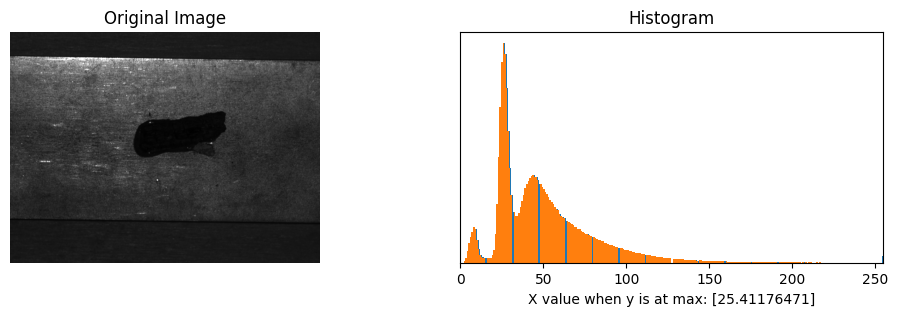

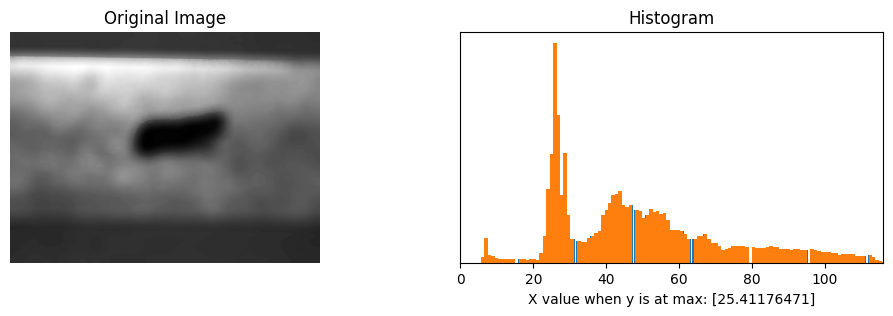

()


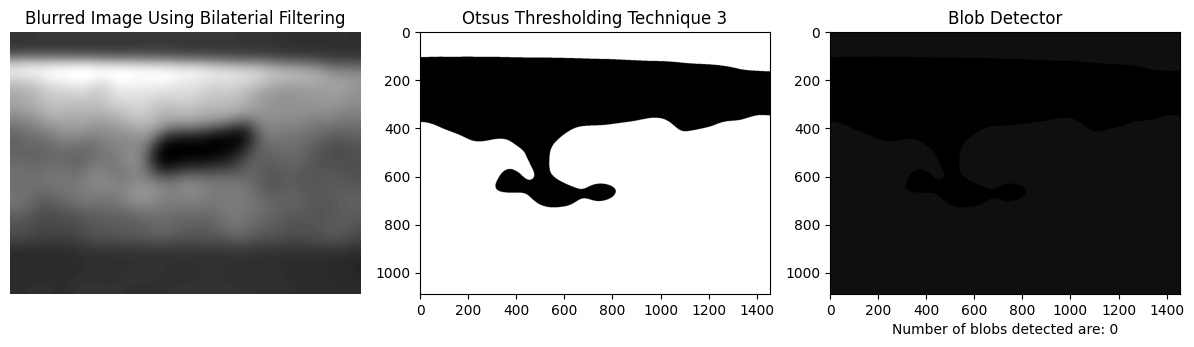

20230418-ac-metal-controled-white-0deg-50kus-sample_A13.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230418-ac-metal-controled-white-0deg-50kus-sample_A13.tif
[[164 166 169 ... 161 162 160]
 [163 162 167 ... 164 160 159]
 [172 172 176 ... 166 157 159]
 ...
 [162 166 180 ... 147 149 143]
 [163 165 177 ... 145 146 146]
 [154 160 165 ... 145 145 145]]


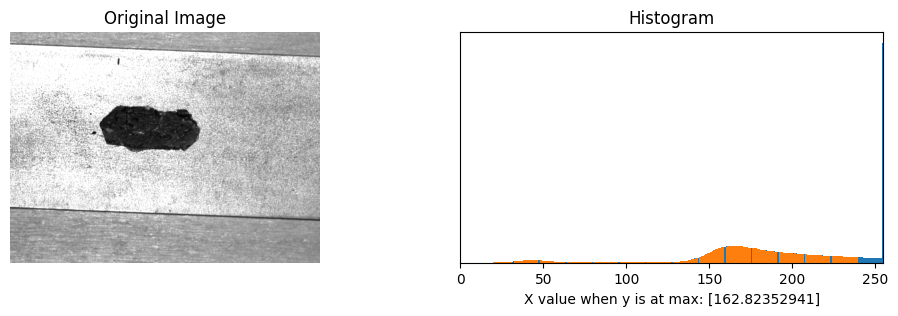

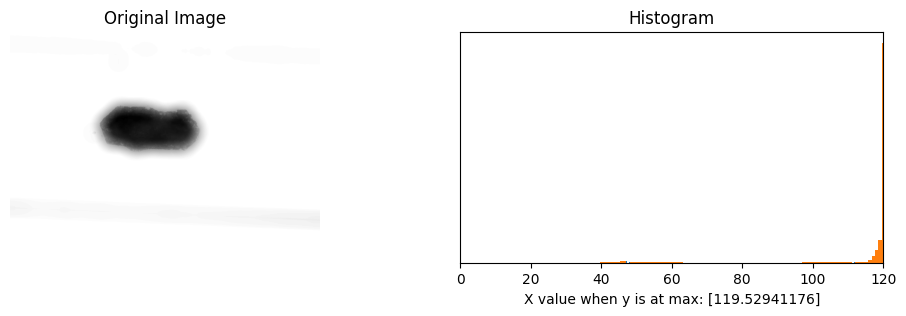

(< cv2.KeyPoint 0000026415A66E10>,)


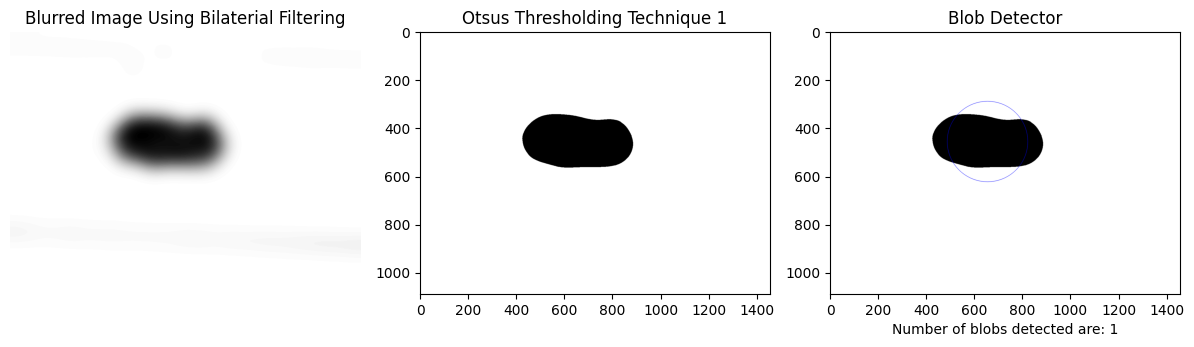

20230418-ac-metal-controled-white-0deg-50kus-sample_B13.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230418-ac-metal-controled-white-0deg-50kus-sample_B13.tif
[[174 166 159 ... 161 164 166]
 [164 165 159 ... 164 163 165]
 [160 165 154 ... 166 161 165]
 ...
 [157 158 158 ... 135 136 137]
 [161 149 153 ... 136 133 138]
 [162 151 150 ... 134 140 139]]


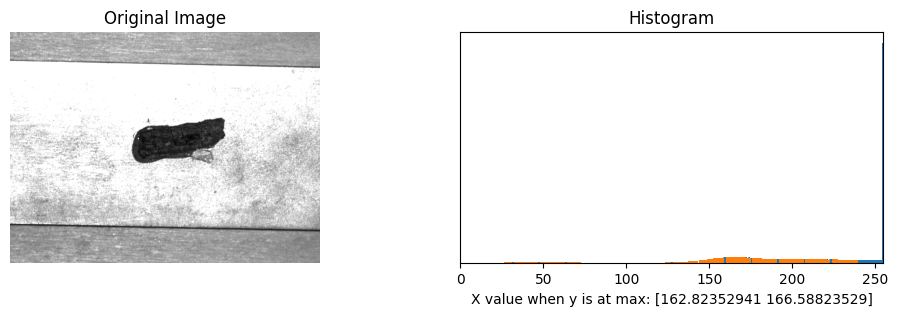

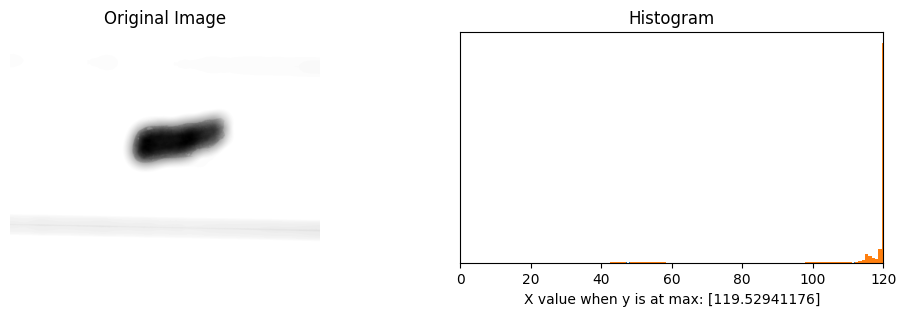

(< cv2.KeyPoint 00000264126B1D50>,)


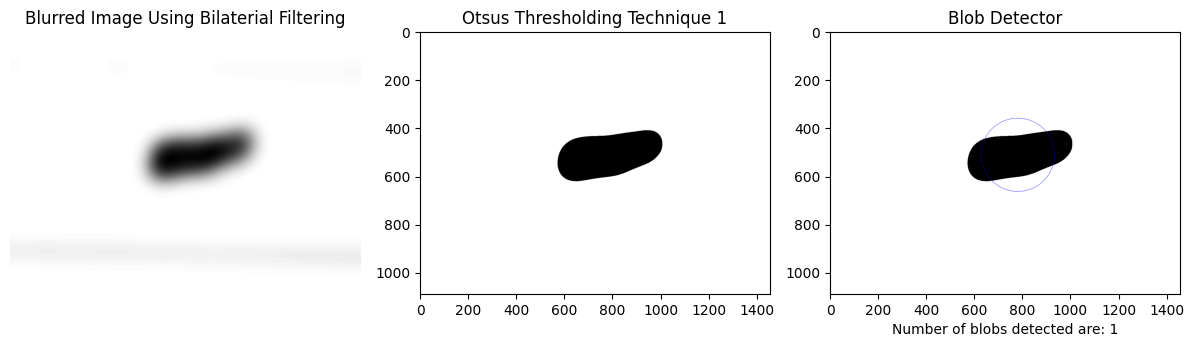

20230419-aa-metal-controled-IR-0deg-500kus-sample_A13.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230419-aa-metal-controled-IR-0deg-500kus-sample_A13.tif
[[203 207 200 ... 206 206 205]
 [200 204 198 ... 203 205 202]
 [201 209 199 ... 206 199 202]
 ...
 [181 186 184 ... 176 172 173]
 [182 184 186 ... 177 177 176]
 [184 185 186 ... 171 169 175]]


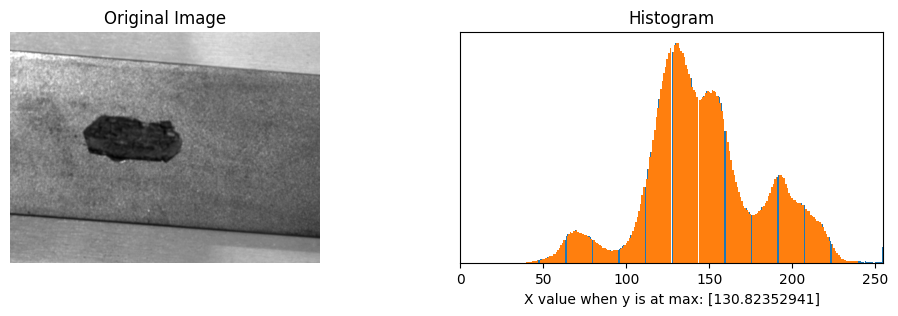

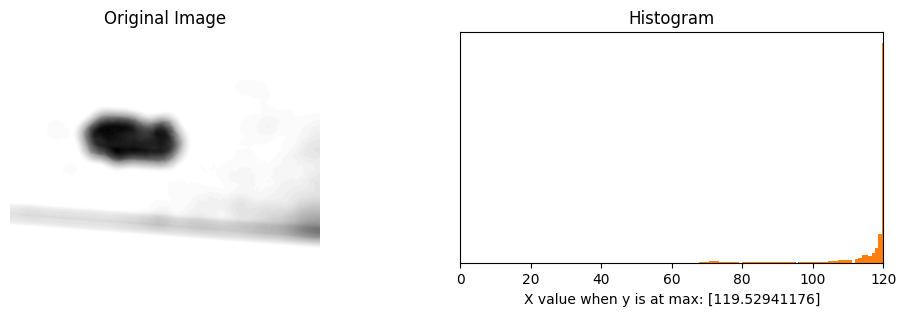

(< cv2.KeyPoint 0000026415520900>,)


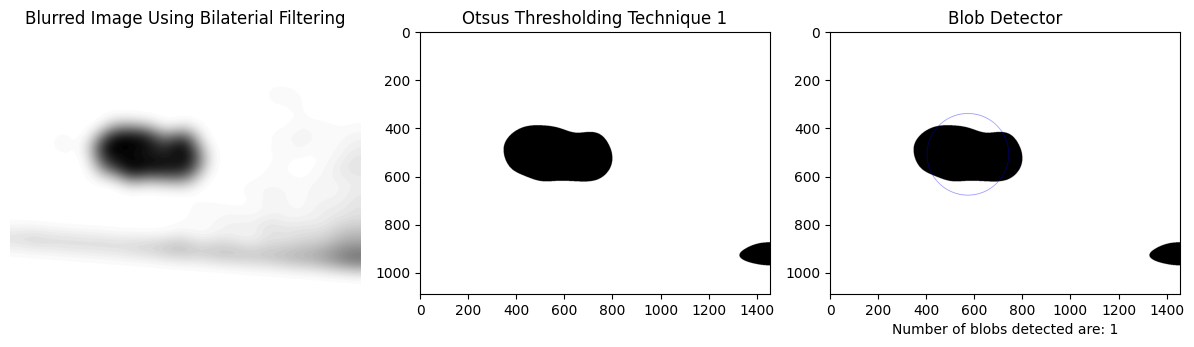

20230419-aa-metal-controled-IR-0deg-500kus-sample_B13.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230419-aa-metal-controled-IR-0deg-500kus-sample_B13.tif
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [251 255 255 ... 255 255 255]
 ...
 [200 198 196 ... 248 247 247]
 [196 198 200 ... 248 251 250]
 [196 194 196 ... 250 249 255]]


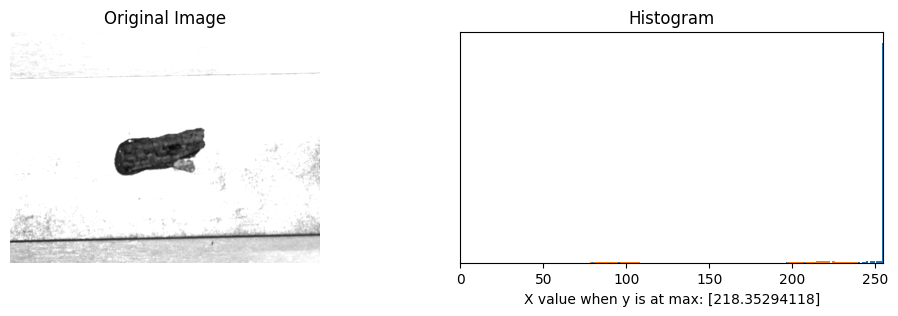

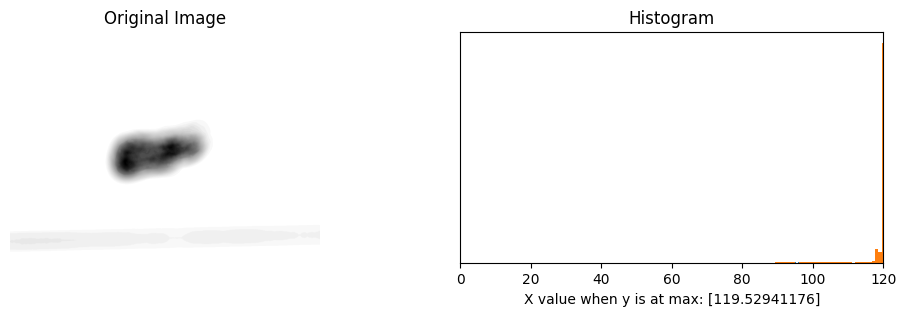

(< cv2.KeyPoint 0000026415AFB870>,)


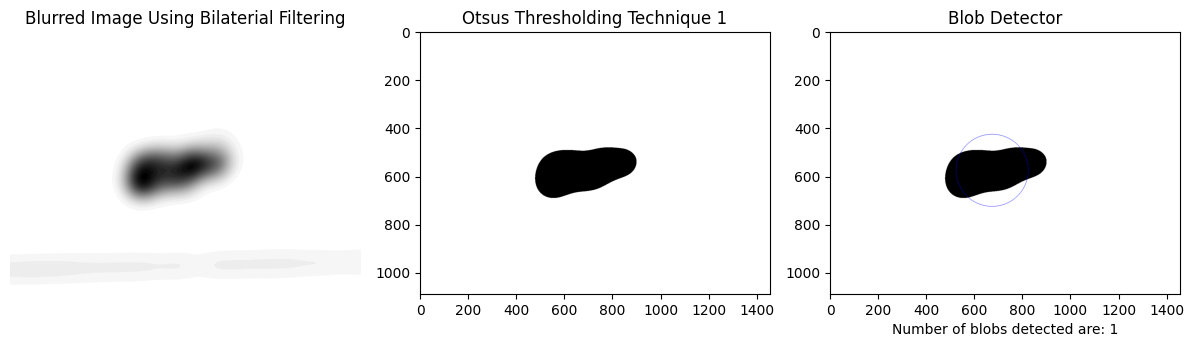

20230419-aa-metal-controled-UV-0deg-100kus-sample_A13.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230419-aa-metal-controled-UV-0deg-100kus-sample_A13.tif
[[82 80 83 ... 66 65 68]
 [73 77 79 ... 65 64 66]
 [72 74 75 ... 63 66 65]
 ...
 [49 49 50 ... 60 58 56]
 [49 52 48 ... 58 58 58]
 [49 48 47 ... 60 58 59]]


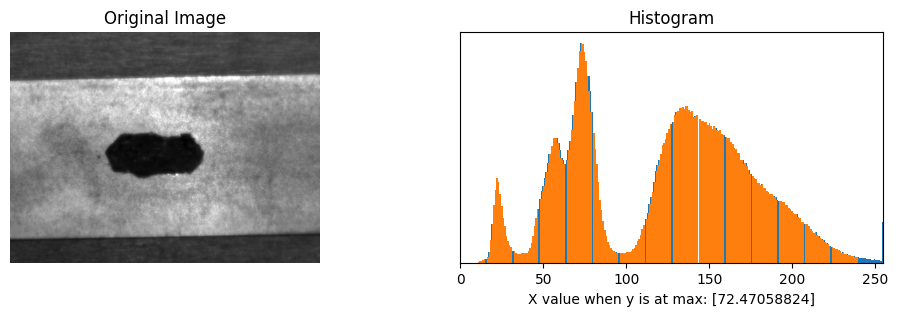

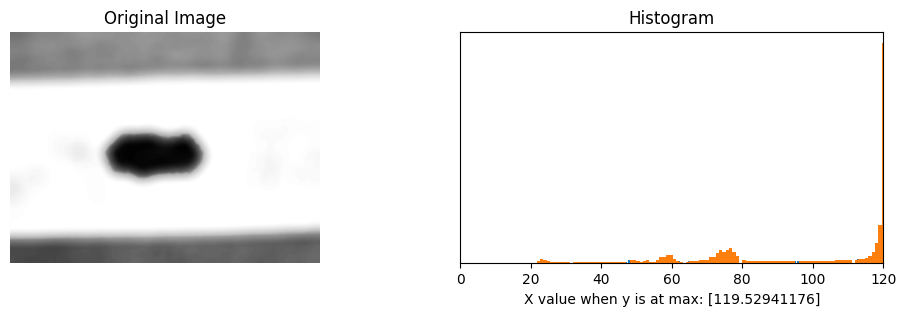

(< cv2.KeyPoint 0000026415DBFAB0>,)


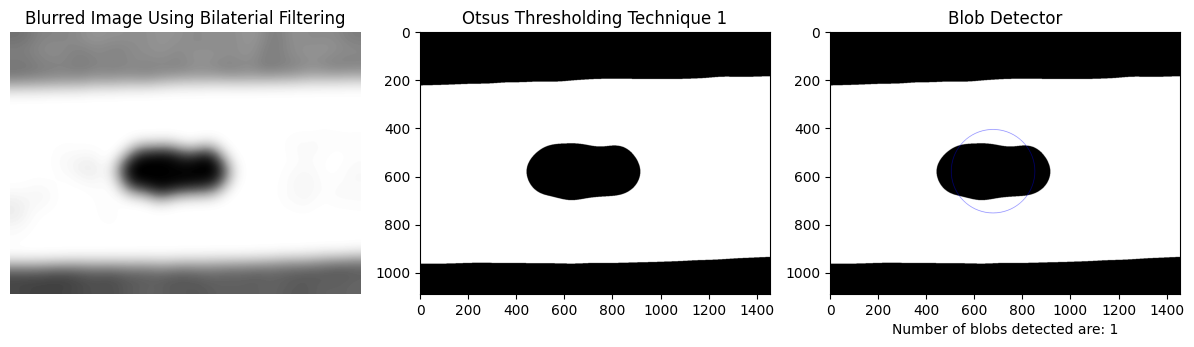

20230419-aa-metal-controled-UV-0deg-100kus-sample_B13.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230419-aa-metal-controled-UV-0deg-100kus-sample_B13.tif
[[ 61  63  63 ...  71  72  74]
 [ 61  65  61 ...  69  71  69]
 [ 61  61  63 ...  72  69  71]
 ...
 [ 95  99  97 ... 102 102 102]
 [ 88  91  93 ...  95  98  96]
 [ 84  84  84 ...  90  89  90]]


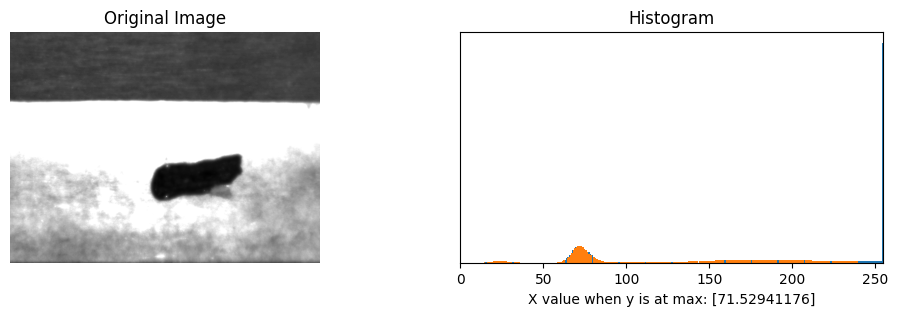

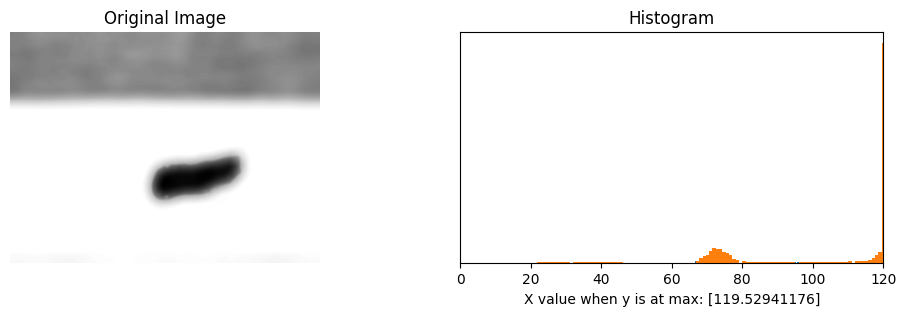

(< cv2.KeyPoint 0000026412C10AE0>,)


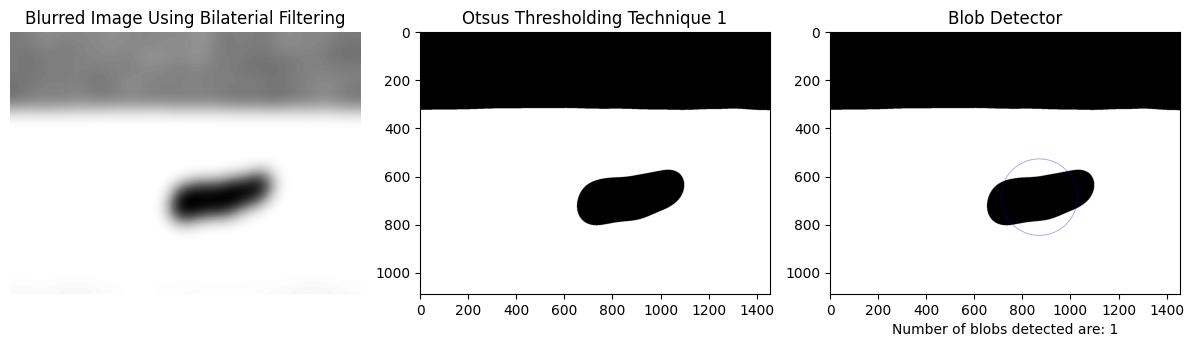

20230419-ab-metal-controled-IR-0deg-250kus-sample_A13.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230419-ab-metal-controled-IR-0deg-250kus-sample_A13.tif
[[102 101 103 ... 103 106 102]
 [102 101 101 ... 105 101  99]
 [101 101 101 ... 103 101 100]
 ...
 [ 91  92  93 ...  90  87  86]
 [ 91  92  93 ...  86  85  84]
 [ 90  94  91 ...  84  85  85]]


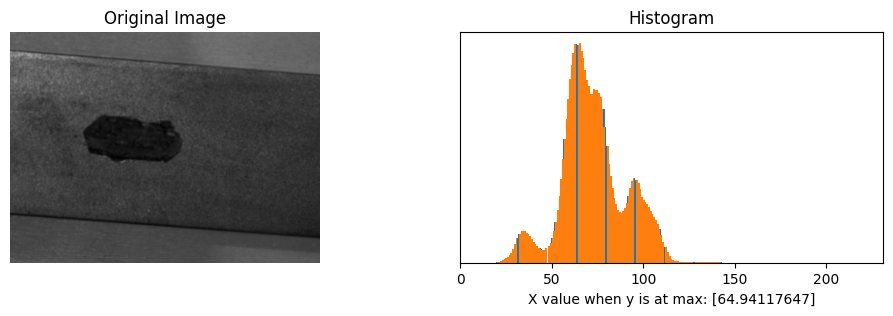

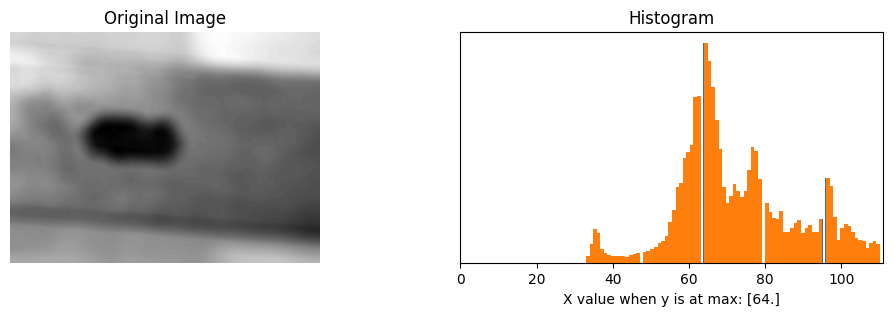

()


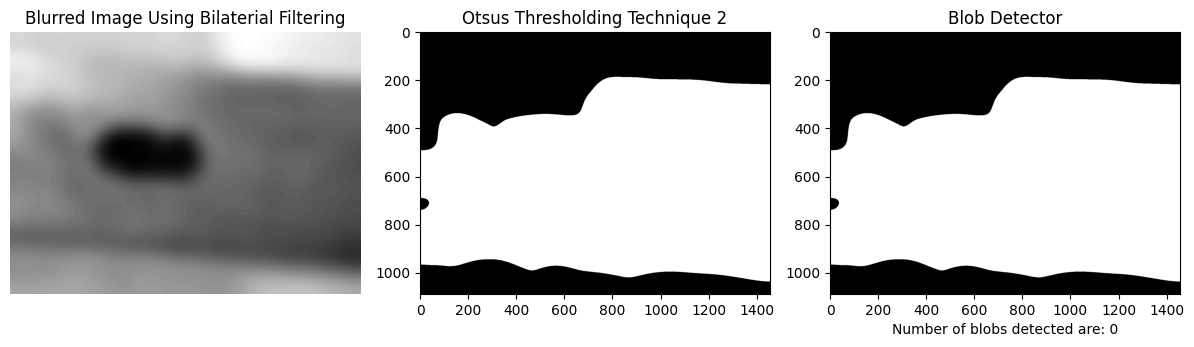

20230419-ab-metal-controled-IR-0deg-250kus-sample_B13.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230419-ab-metal-controled-IR-0deg-250kus-sample_B13.tif
[[127 128 130 ... 135 137 138]
 [126 127 134 ... 134 135 134]
 [119 125 131 ... 137 133 137]
 ...
 [ 95  96  96 ... 123 122 123]
 [ 95  98  96 ... 127 126 119]
 [ 93  97  95 ... 124 121 122]]


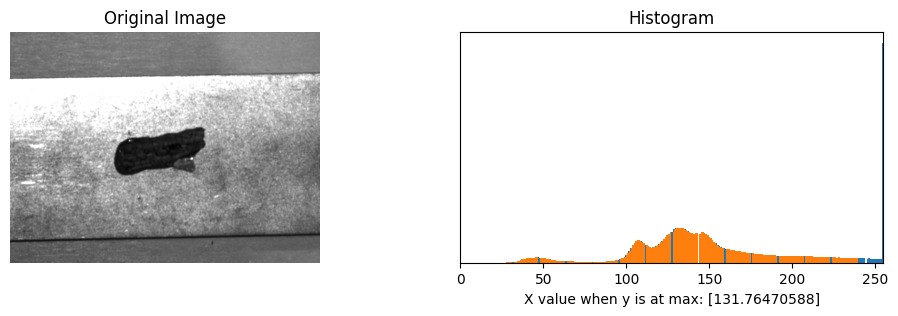

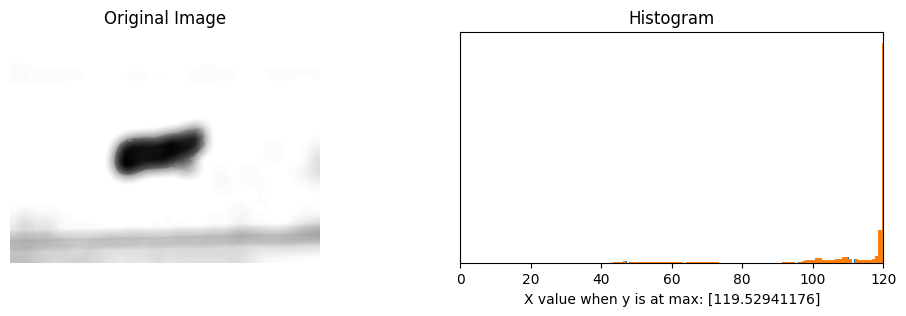

(< cv2.KeyPoint 0000026415C9B750>,)


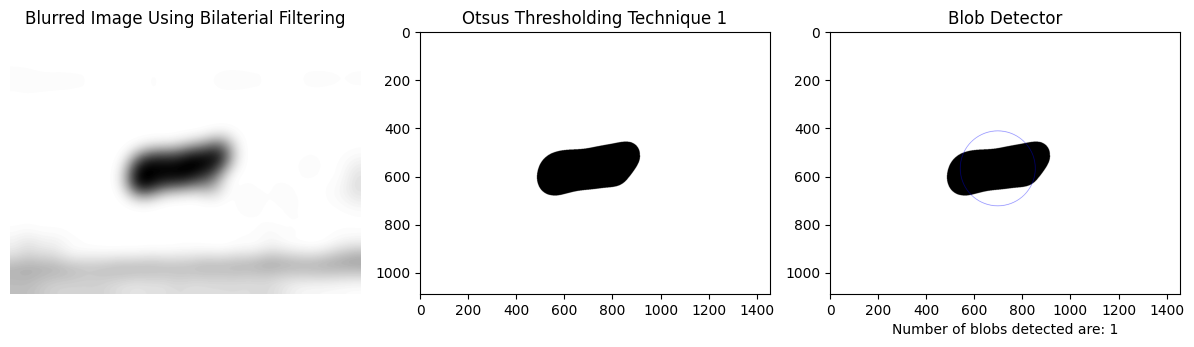

20230419-ab-metal-controled-UV-0deg-50kus-sample_A13.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230419-ab-metal-controled-UV-0deg-50kus-sample_A13.tif
[[37 39 40 ... 34 35 33]
 [36 37 39 ... 34 33 31]
 [34 33 35 ... 31 32 34]
 ...
 [26 24 26 ... 29 27 27]
 [26 24 24 ... 29 29 27]
 [23 23 24 ... 29 30 27]]


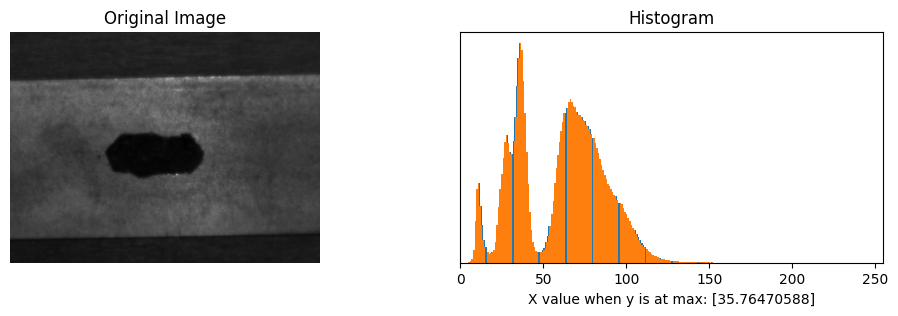

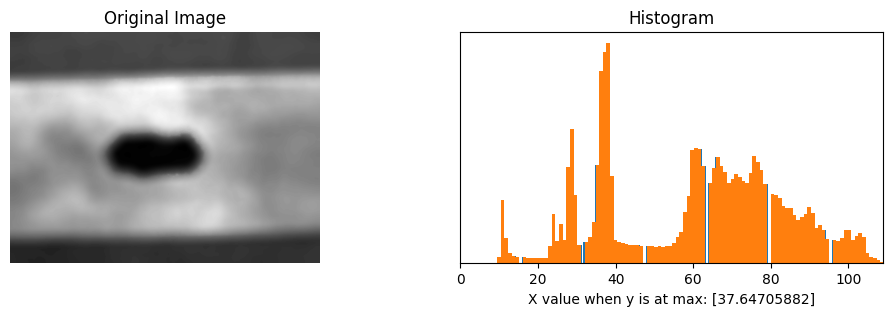

()


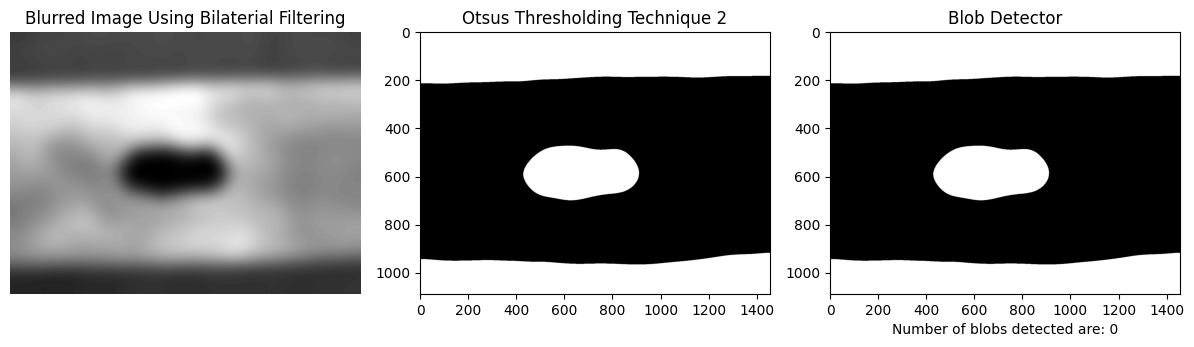

20230419-ab-metal-controled-UV-0deg-50kus-sample_B13.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230419-ab-metal-controled-UV-0deg-50kus-sample_B13.tif
[[31 30 29 ... 34 34 36]
 [31 30 30 ... 35 35 35]
 [30 31 29 ... 36 34 35]
 ...
 [47 48 49 ... 48 51 50]
 [44 46 45 ... 46 48 47]
 [39 40 39 ... 43 43 43]]


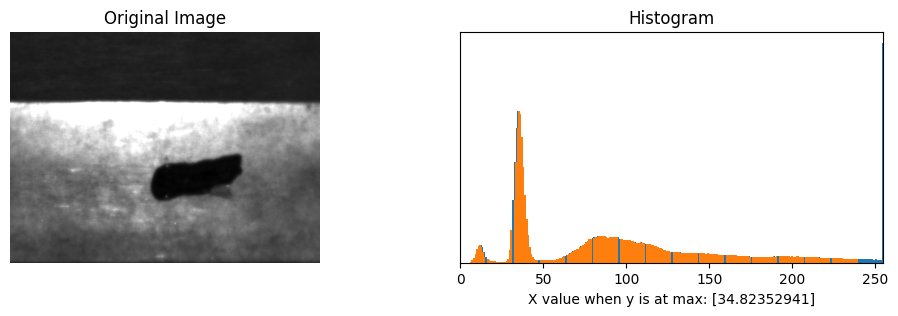

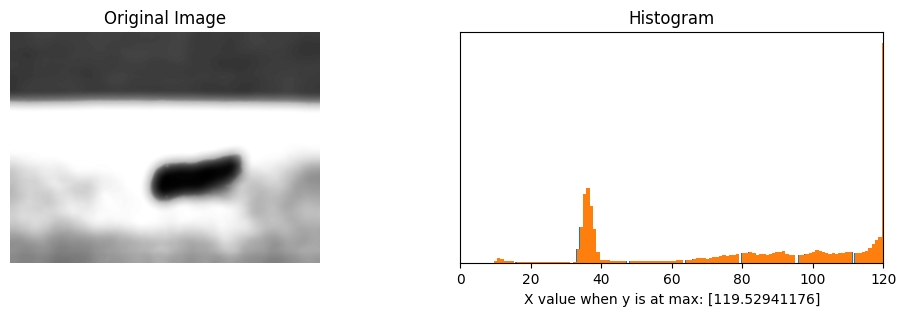

(< cv2.KeyPoint 000002641586E570>,)


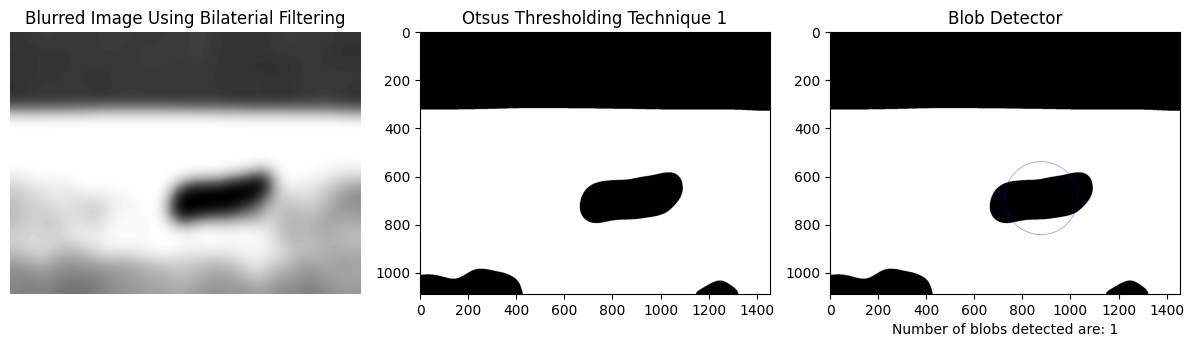

20230419-ac-metal-controled-IR-0deg-150kus-sample_A13.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230419-ac-metal-controled-IR-0deg-150kus-sample_A13.tif
[[59 61 60 ... 61 62 56]
 [58 60 61 ... 61 60 61]
 [60 60 60 ... 60 58 62]
 ...
 [54 54 52 ... 51 51 52]
 [54 58 56 ... 51 50 51]
 [53 53 54 ... 51 50 51]]


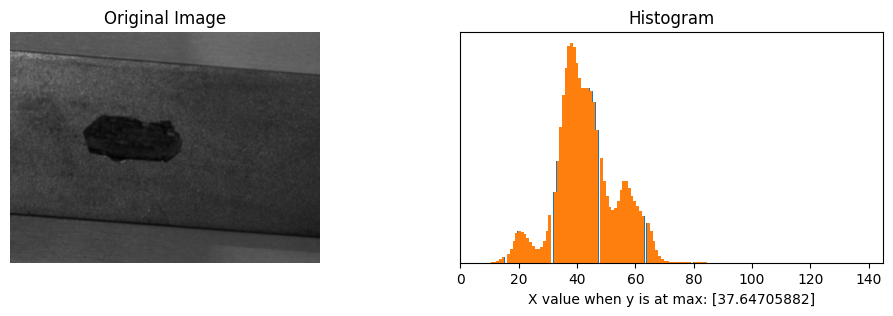

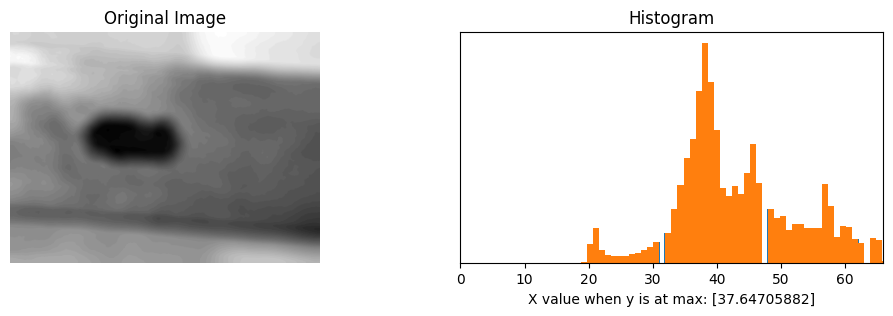

()


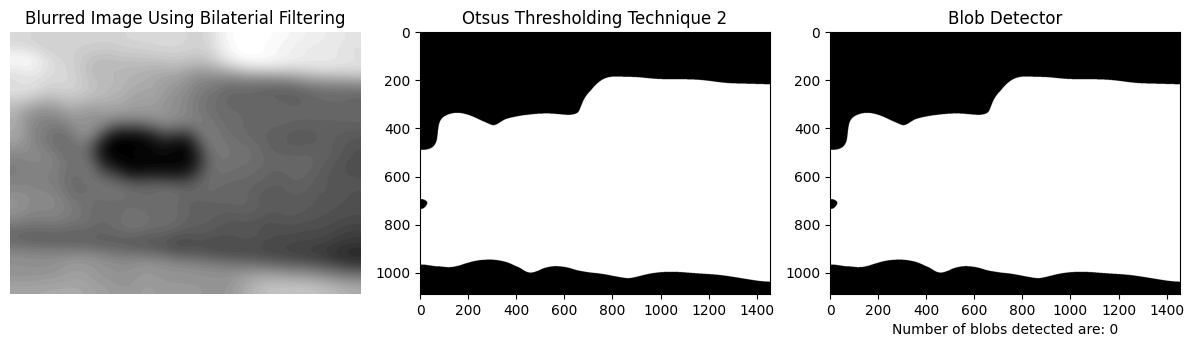

20230419-ac-metal-controled-IR-0deg-150kus-sample_B13.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230419-ac-metal-controled-IR-0deg-150kus-sample_B13.tif
[[76 77 77 ... 79 80 81]
 [75 75 79 ... 82 79 80]
 [73 73 75 ... 79 80 81]
 ...
 [55 56 58 ... 72 74 74]
 [57 58 58 ... 73 73 76]
 [56 54 56 ... 73 72 75]]


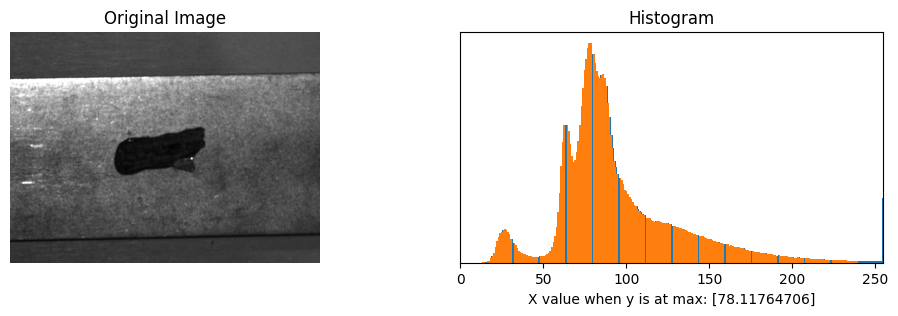

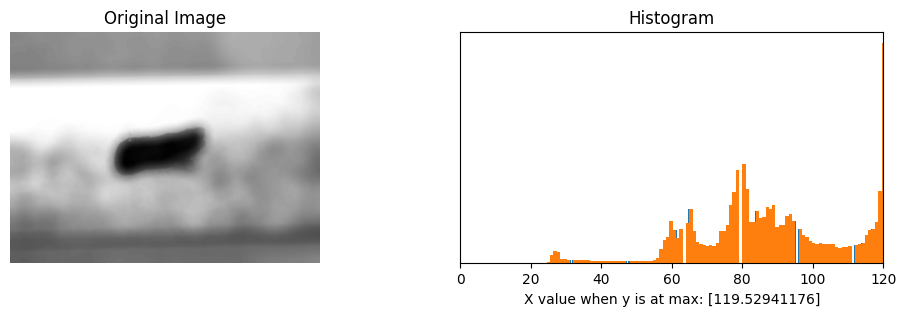

()


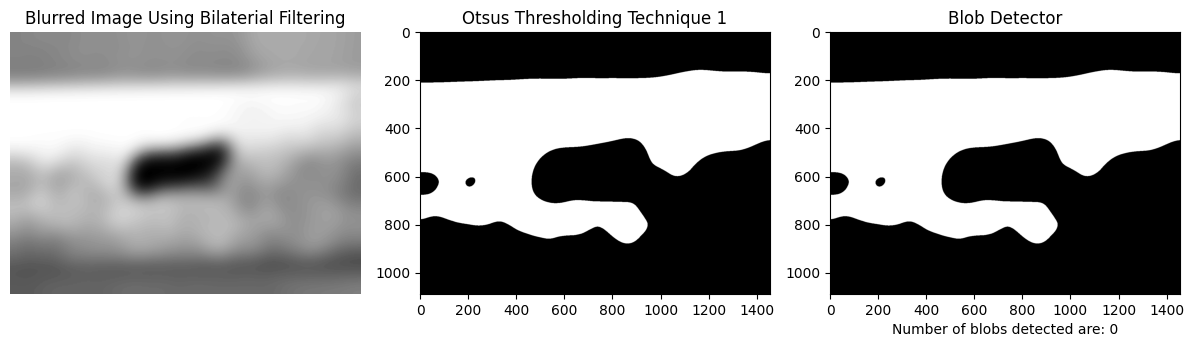

20230419-ac-metal-controled-UV-0deg-30kus-sample_A13.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230419-ac-metal-controled-UV-0deg-30kus-sample_A13.tif
[[22 24 25 ... 19 19 20]
 [21 22 21 ... 20 19 19]
 [20 21 20 ... 19 19 18]
 ...
 [13 14 15 ... 17 16 16]
 [15 15 13 ... 17 17 17]
 [15 13 14 ... 18 17 17]]


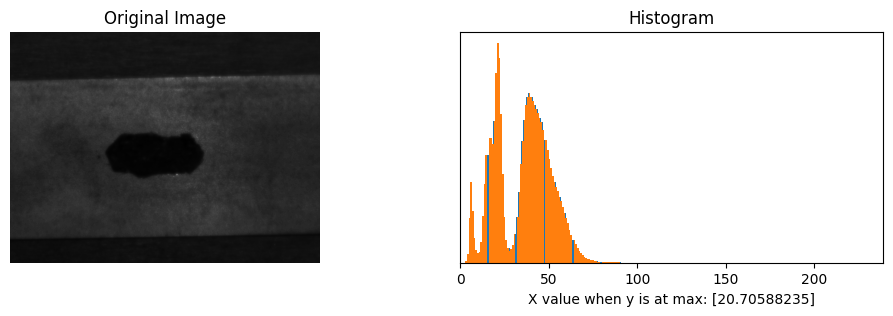

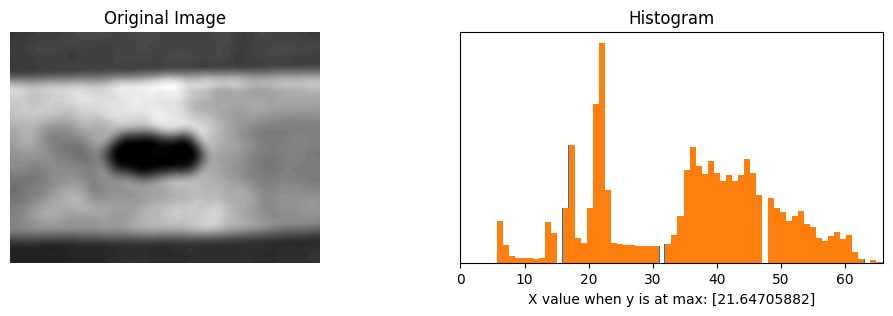

()


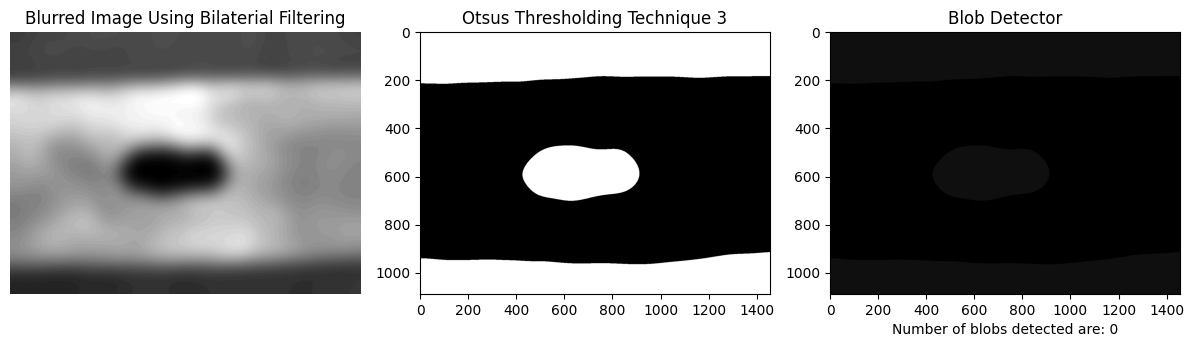

20230419-ac-metal-controled-UV-0deg-30kus-sample_B13.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230419-ac-metal-controled-UV-0deg-30kus-sample_B13.tif
[[18 17 18 ... 21 19 20]
 [18 18 18 ... 21 22 20]
 [17 19 18 ... 21 19 21]
 ...
 [27 28 31 ... 31 29 29]
 [26 25 26 ... 28 28 28]
 [23 23 25 ... 26 25 25]]


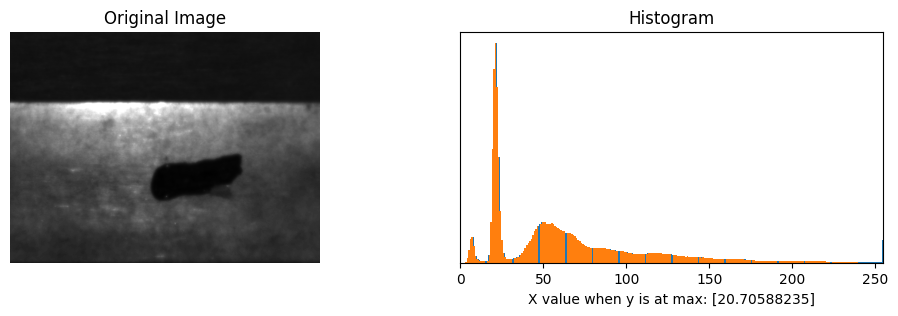

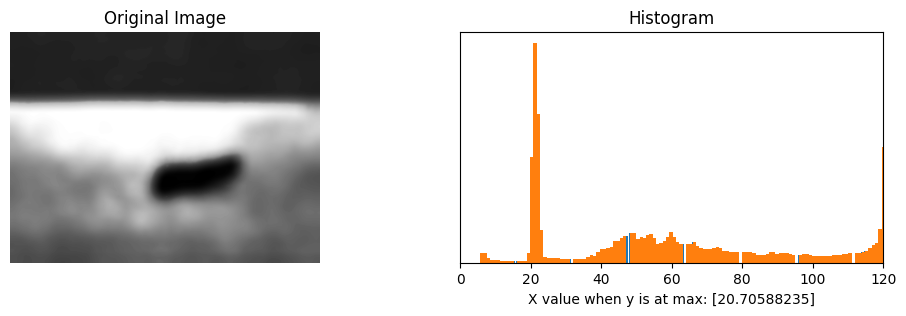

()


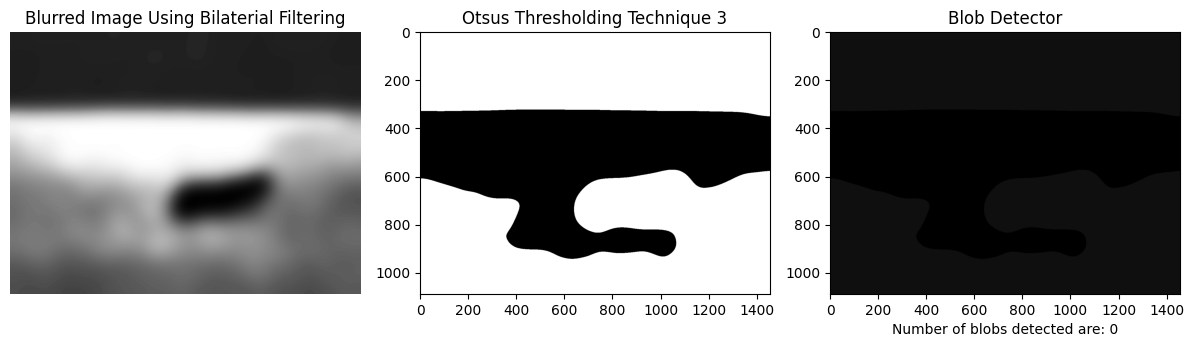

20230426-aa-metal-controled-white-0deg-10kus-sample_B13_C04.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230426-aa-metal-controled-white-0deg-10kus-sample_B13_C04.tif
[[38 37 37 ... 34 34 33]
 [36 37 36 ... 33 33 33]
 [37 38 35 ... 33 31 33]
 ...
 [32 32 32 ... 29 31 31]
 [30 31 32 ... 31 32 29]
 [31 29 31 ... 29 30 31]]


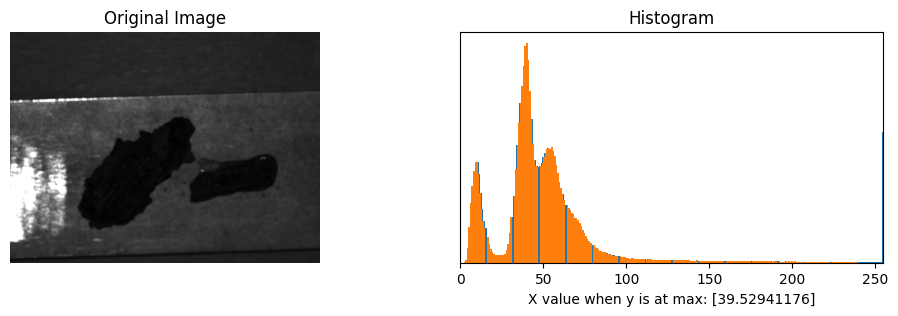

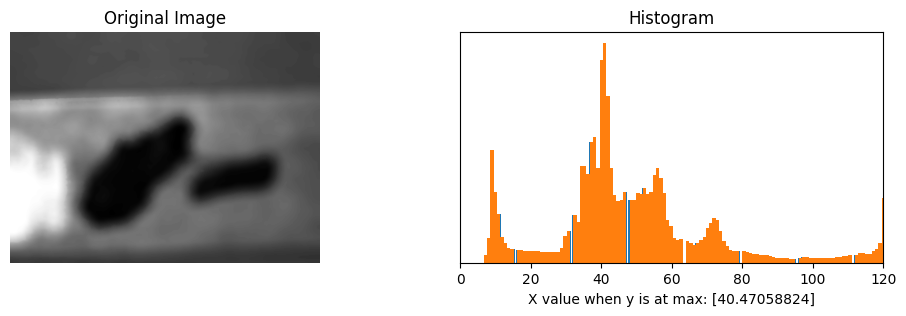

()


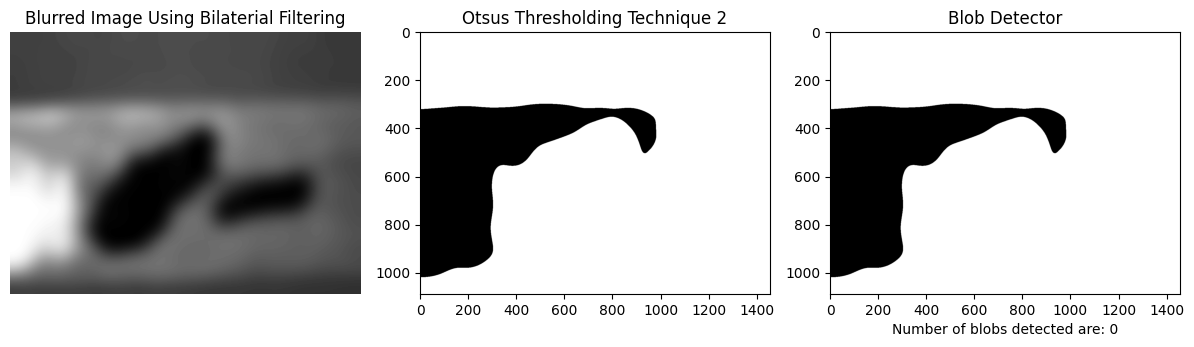

20230426-ab-metal-controled-white-0deg-30kus-sample_B13_C04.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230426-ab-metal-controled-white-0deg-30kus-sample_B13_C04.tif
[[109 110 108 ... 103 105 101]
 [113 111 109 ... 104 104 102]
 [109 109 110 ... 107 105 104]
 ...
 [ 94  94  95 ...  93  90  90]
 [ 96  97  96 ...  91  93  91]
 [ 94  95  95 ...  95  93  97]]


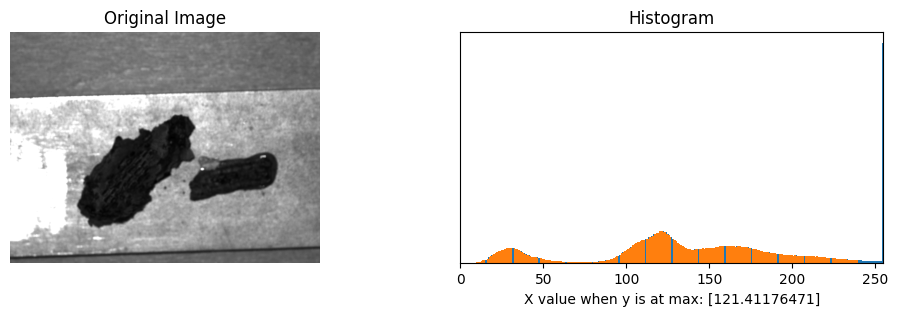

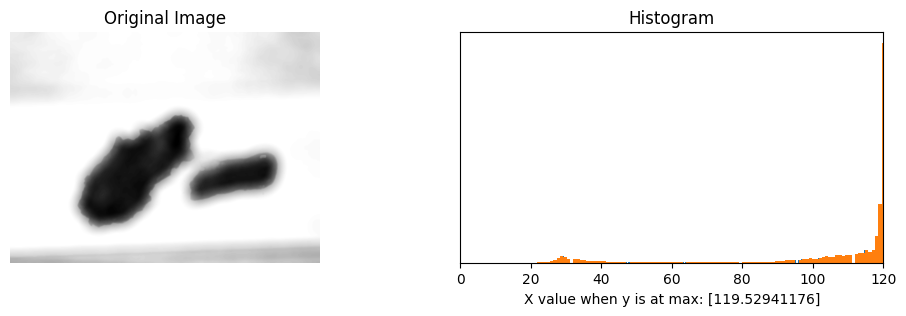

(< cv2.KeyPoint 00000264159FFAB0>, < cv2.KeyPoint 00000264159FFF30>)


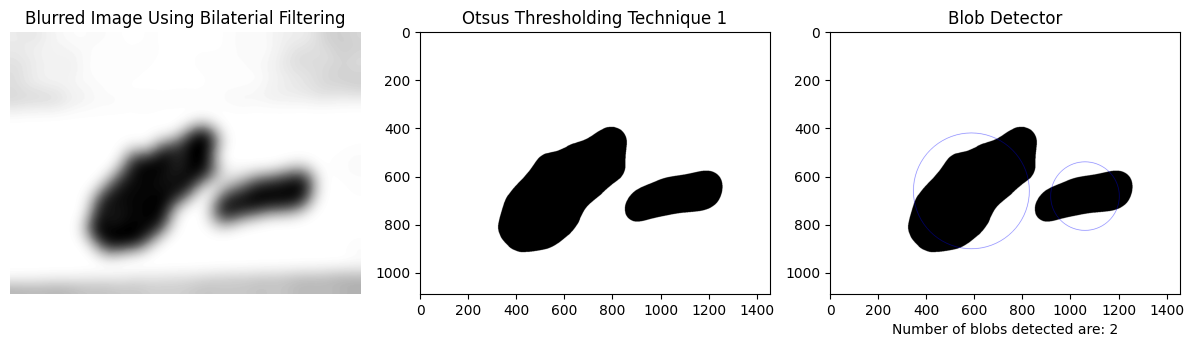

20230426-ac-metal-controled-white-0deg-50kus-sample_B13_C04.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230426-ac-metal-controled-white-0deg-50kus-sample_B13_C04.tif
[[187 185 186 ... 173 172 172]
 [183 185 186 ... 180 177 175]
 [184 185 182 ... 181 176 178]
 ...
 [160 159 159 ... 156 156 153]
 [162 160 163 ... 157 157 156]
 [159 158 160 ... 161 162 164]]


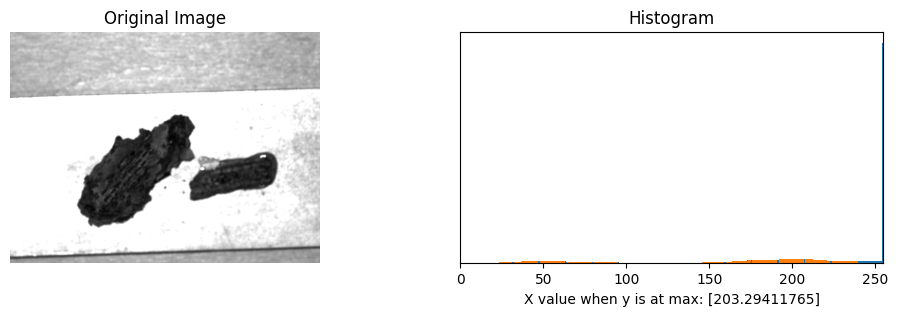

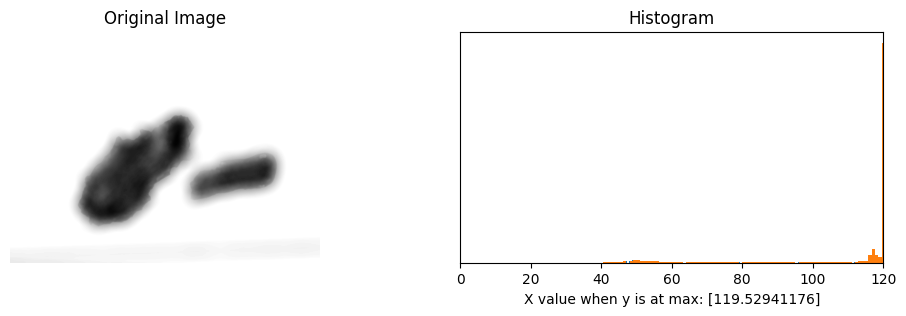

(< cv2.KeyPoint 000002641602B150>, < cv2.KeyPoint 0000026415AFB630>)


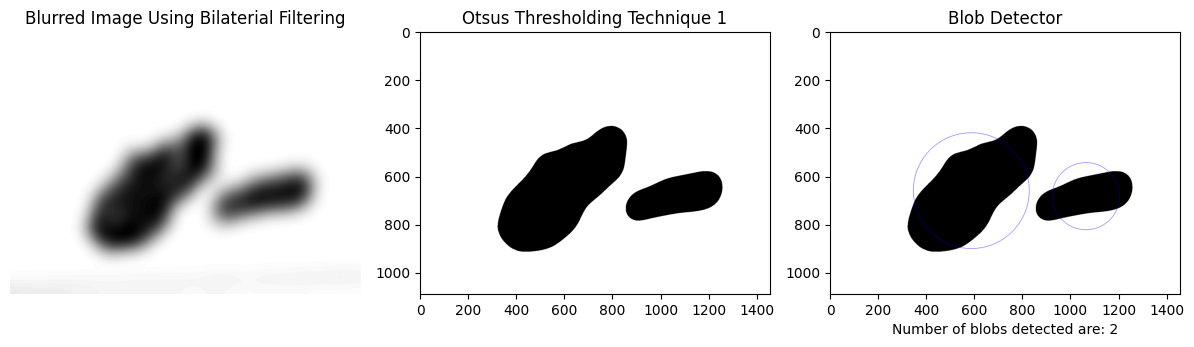

20230426-ea-painted_metal-controled-white-0deg-10kus-sample_A11.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230426-ea-painted_metal-controled-white-0deg-10kus-sample_A11.tif
[[33 33 32 ... 33 32 32]
 [33 32 32 ... 31 31 32]
 [32 33 32 ... 31 31 33]
 ...
 [32 34 33 ... 29 29 28]
 [32 32 34 ... 27 27 29]
 [32 32 32 ... 28 27 28]]


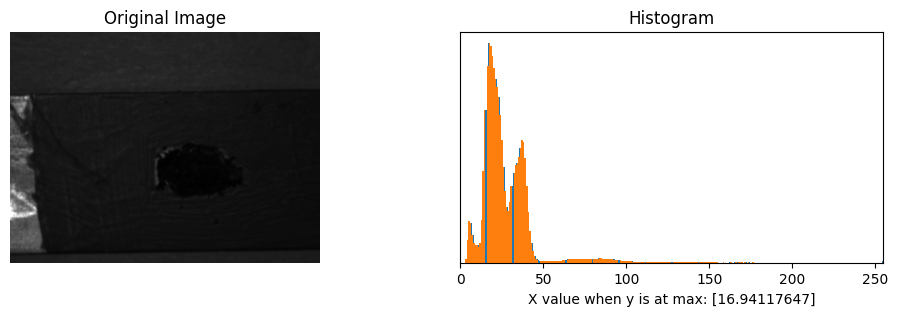

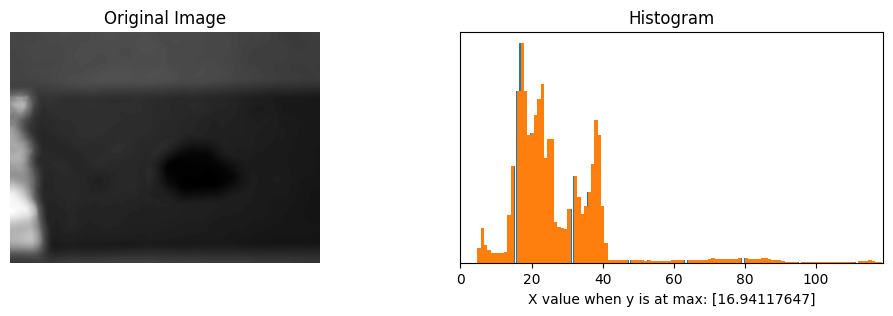

()


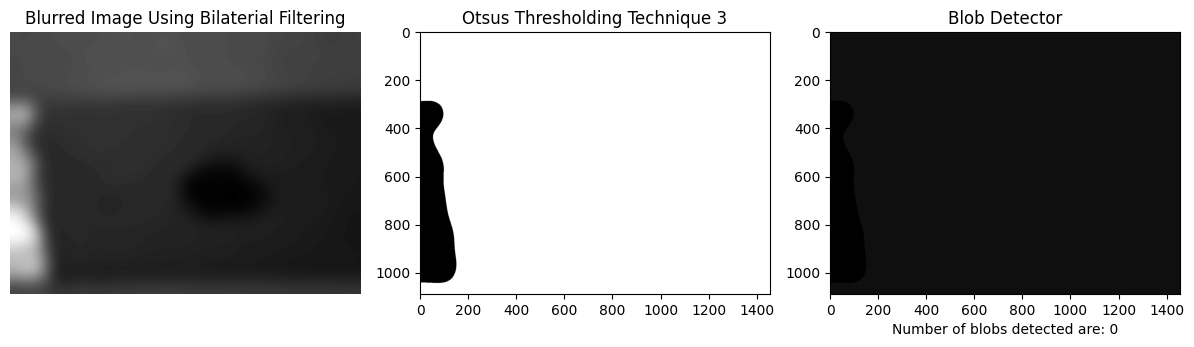

20230426-eb-painted_metal-controled-white-0deg-30kus-sample_A11.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230426-eb-painted_metal-controled-white-0deg-30kus-sample_A11.tif
[[104 105 102 ...  96  99  98]
 [107 101 102 ...  98  97  96]
 [102 106 102 ...  99  95  97]
 ...
 [101 102 103 ...  86  87  86]
 [ 99 101 100 ...  84  84  86]
 [ 99 100 102 ...  85  86  90]]


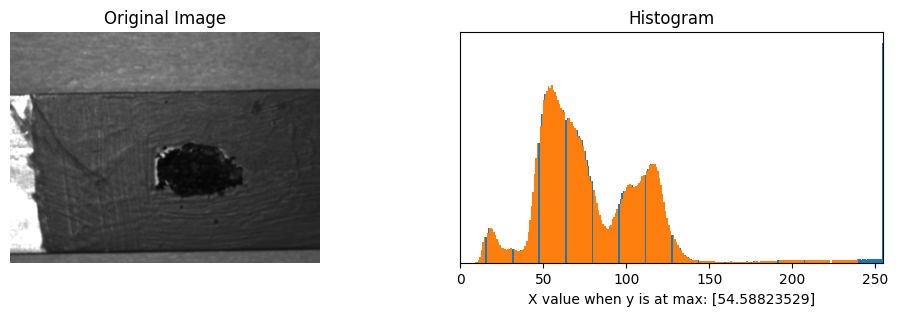

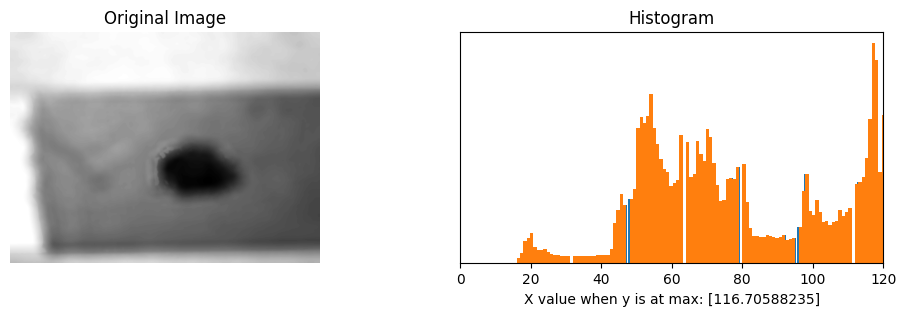

()


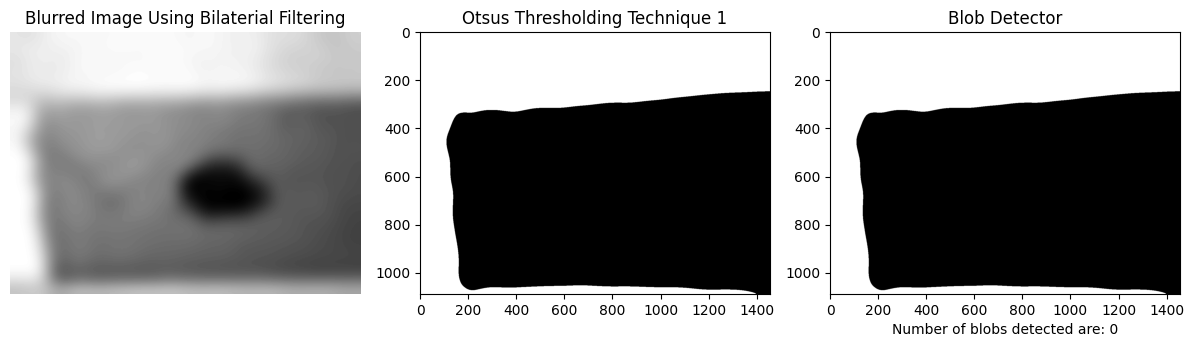

20230426-ec-painted_metal-controled-white-0deg-50kus-sample_A11.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230426-ec-painted_metal-controled-white-0deg-50kus-sample_A11.tif
[[175 176 174 ... 160 161 159]
 [174 176 174 ... 161 162 162]
 [172 173 174 ... 163 159 166]
 ...
 [168 169 170 ... 144 149 144]
 [168 171 171 ... 144 142 145]
 [163 165 171 ... 146 141 150]]


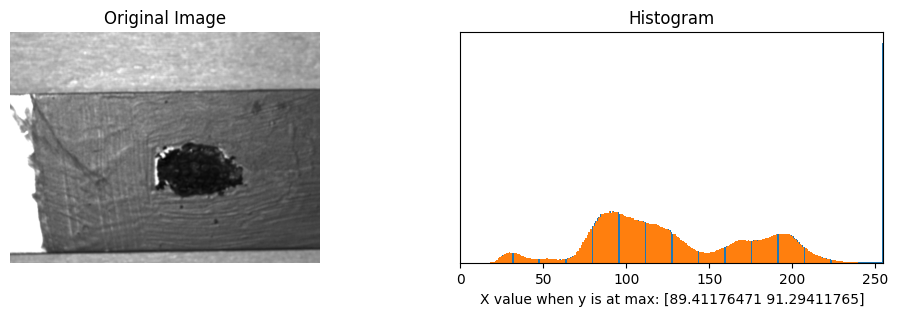

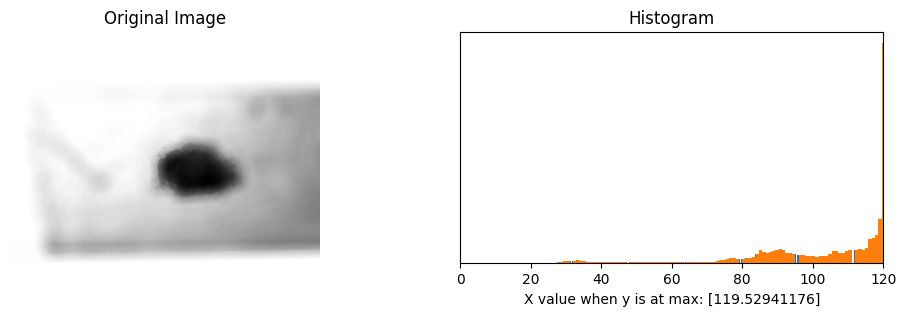

()


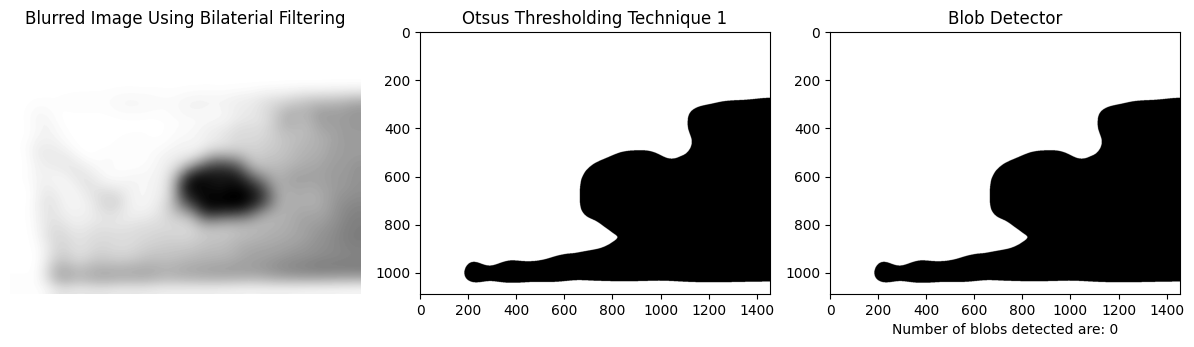

20230426-ia-metal-controled-white-0deg-10kus-sample_B13_C04_Gum.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230426-ia-metal-controled-white-0deg-10kus-sample_B13_C04_Gum.tif
[[31 33 32 ... 33 32 34]
 [32 32 31 ... 34 31 32]
 [33 32 31 ... 33 33 33]
 ...
 [13 14 13 ... 28 28 27]
 [14 14 16 ... 29 28 28]
 [15 15 16 ... 28 27 30]]


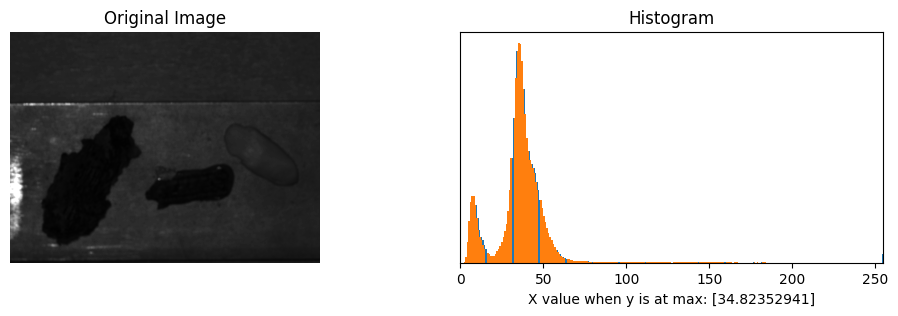

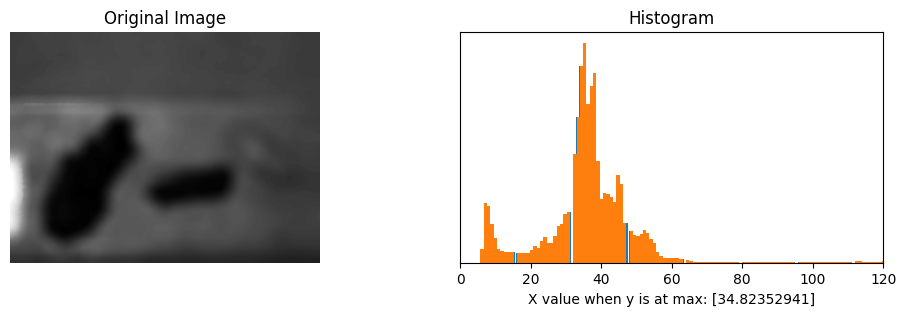

()


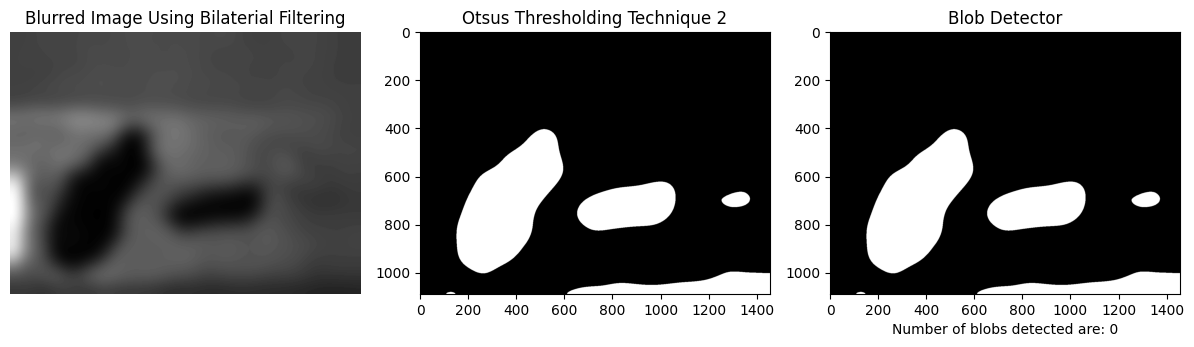

20230426-ib-metal-controled-white-0deg-30kus-sample_B13_C04_Gum.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230426-ib-metal-controled-white-0deg-30kus-sample_B13_C04_Gum.tif
[[100 100 100 ... 101  98 100]
 [ 95  98 100 ... 100 100 100]
 [ 96  96  96 ... 101  98 100]
 ...
 [ 45  45  42 ...  87  87  85]
 [ 45  46  47 ...  90  87  88]
 [ 49  51  48 ...  88  88  84]]


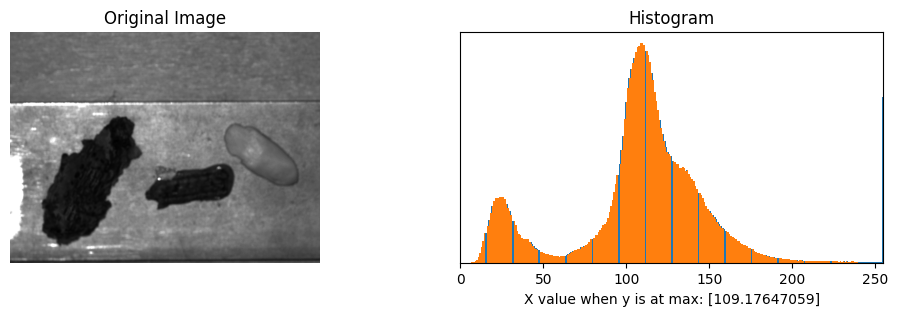

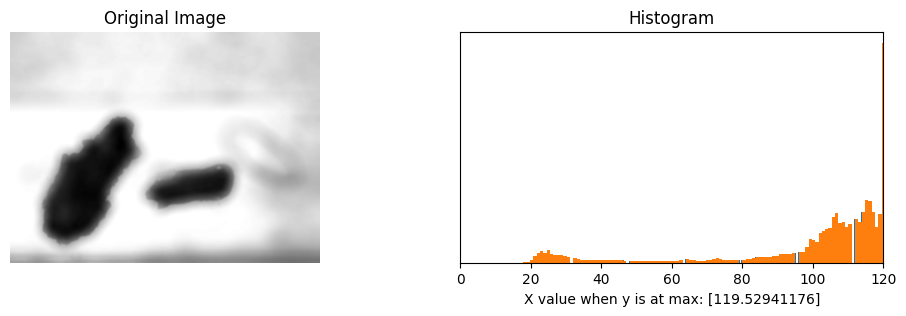

(< cv2.KeyPoint 0000026415B282A0>, < cv2.KeyPoint 0000026415B28BA0>)


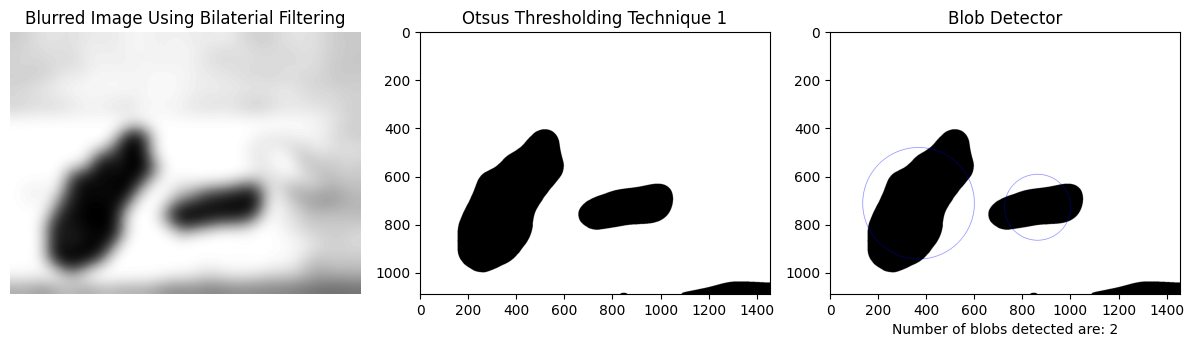

20230426-ic-metal-controled-white-0deg-50kus-sample_B13_C04_Gum.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230426-ic-metal-controled-white-0deg-50kus-sample_B13_C04_Gum.tif
[[136 138 139 ... 155 154 150]
 [135 135 132 ... 162 164 163]
 [143 136 137 ... 164 166 171]
 ...
 [164 164 167 ...  67  67  67]
 [163 166 164 ...  62  64  62]
 [159 155 160 ...  64  65  64]]


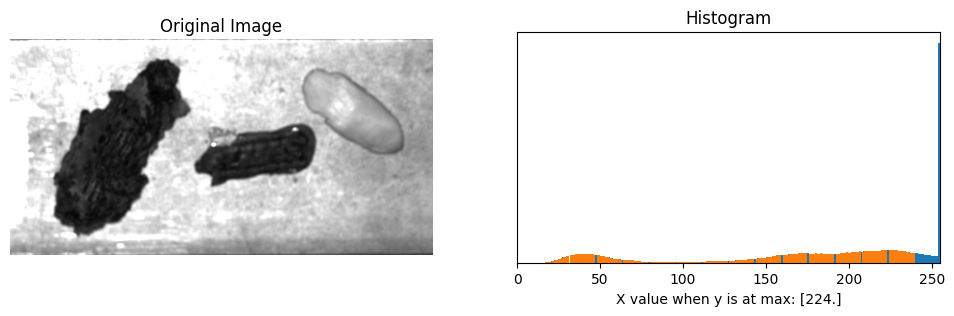

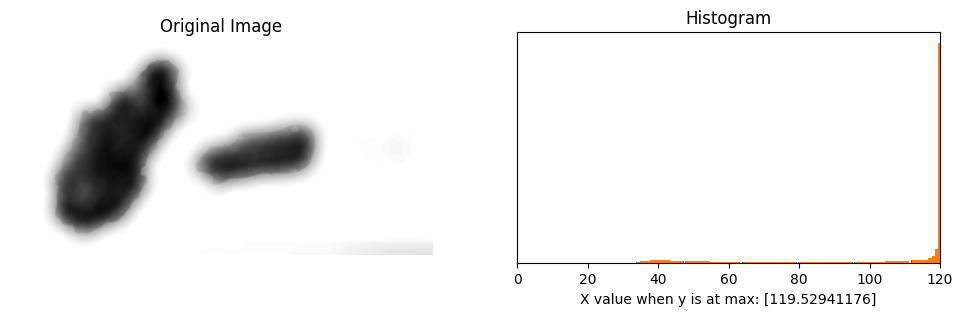

(< cv2.KeyPoint 000002641626DED0>, < cv2.KeyPoint 000002641626DC30>)


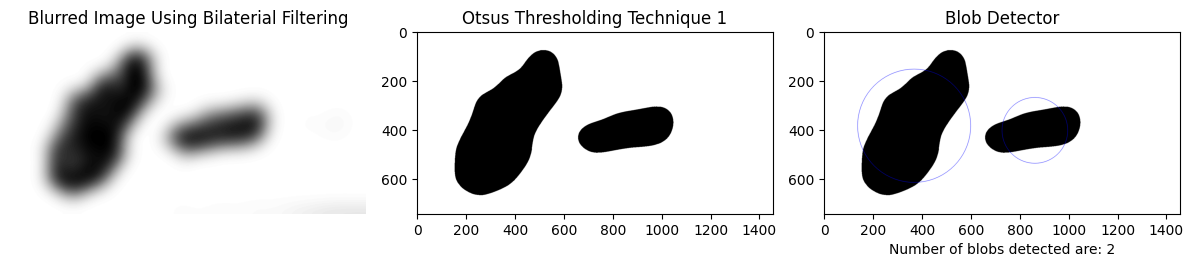

20230426-ma-metal-controled-white-0deg-10kus-sample_B13_C04_Gum_Mud.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230426-ma-metal-controled-white-0deg-10kus-sample_B13_C04_Gum_Mud.tif
[[33 33 32 ... 32 32 34]
 [32 33 31 ... 32 33 33]
 [33 32 33 ... 33 32 34]
 ...
 [14 15 14 ... 28 29 28]
 [16 15 16 ... 29 27 27]
 [18 19 17 ... 28 27 27]]


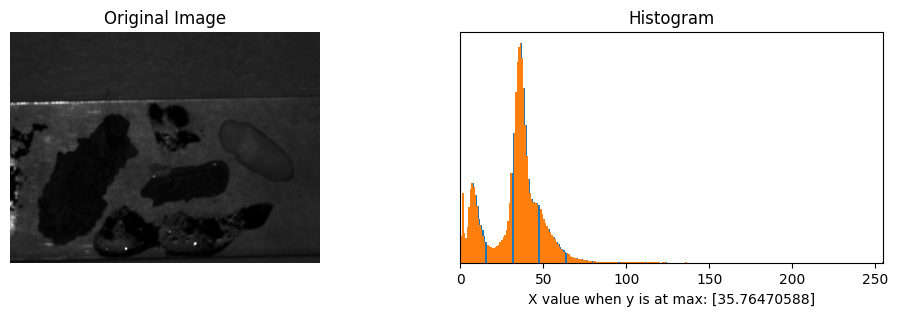

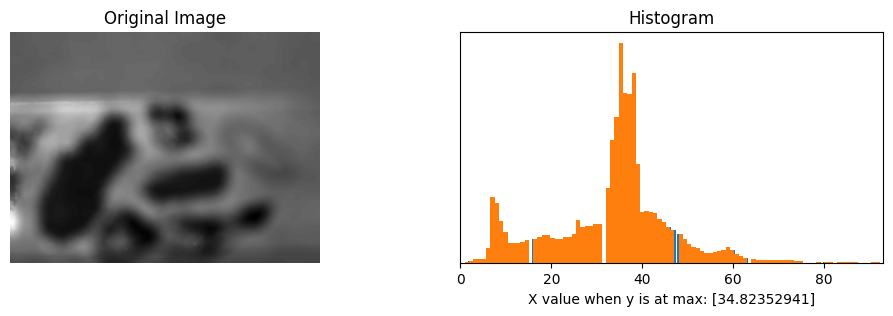

(< cv2.KeyPoint 0000026416A5F090>,)


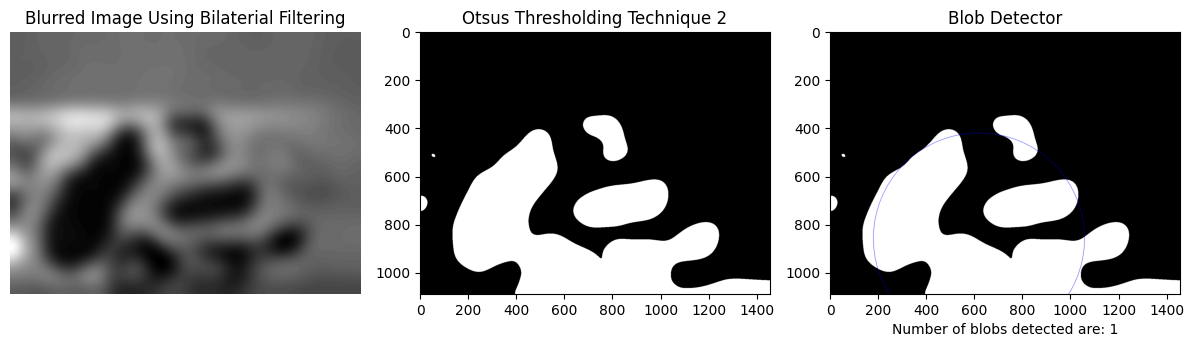

20230426-mb-metal-controled-white-0deg-30kus-sample_B13_C04_Gum_Mud.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230426-mb-metal-controled-white-0deg-30kus-sample_B13_C04_Gum_Mud.tif
[[103 102 100 ... 100 101 100]
 [ 98 102  99 ... 100 100 102]
 [ 97 100  98 ... 104 102 101]
 ...
 [ 47  49  48 ...  87  87  86]
 [ 51  52  52 ...  88  87  86]
 [ 57  55  56 ...  89  90  88]]


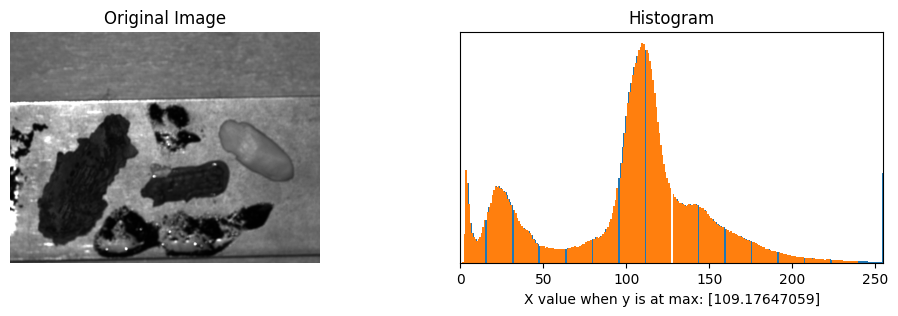

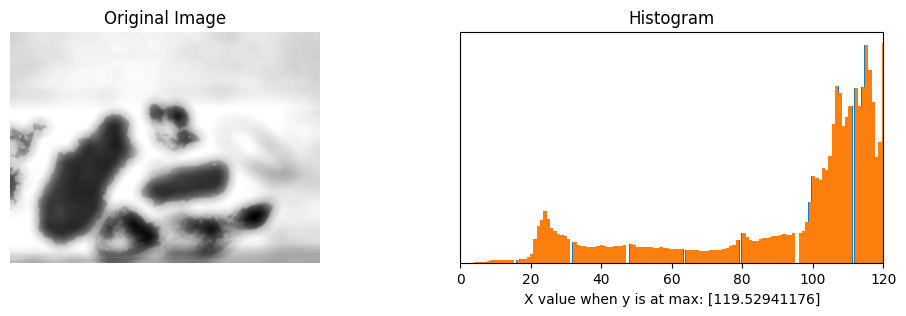

(< cv2.KeyPoint 00000264155FBF00>, < cv2.KeyPoint 00000264155FBAB0>)


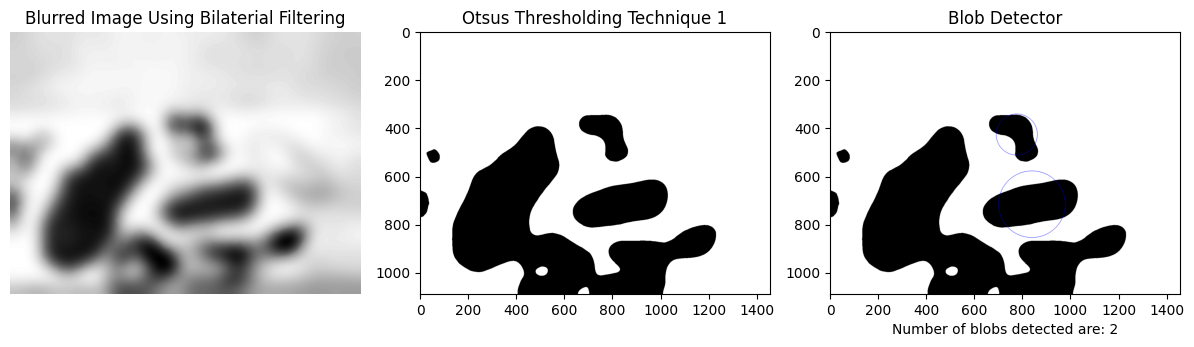

20230426-mc-metal-controled-white-0deg-50kus-sample_B13_C04_Gum_Mud.tif
C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees\20230426-mc-metal-controled-white-0deg-50kus-sample_B13_C04_Gum_Mud.tif
[[167 169 167 ... 165 166 173]
 [163 165 163 ... 165 168 166]
 [161 166 162 ... 171 170 168]
 ...
 [ 82  80  83 ... 144 145 145]
 [ 87  90  92 ... 149 149 147]
 [ 97  93  96 ... 143 148 147]]


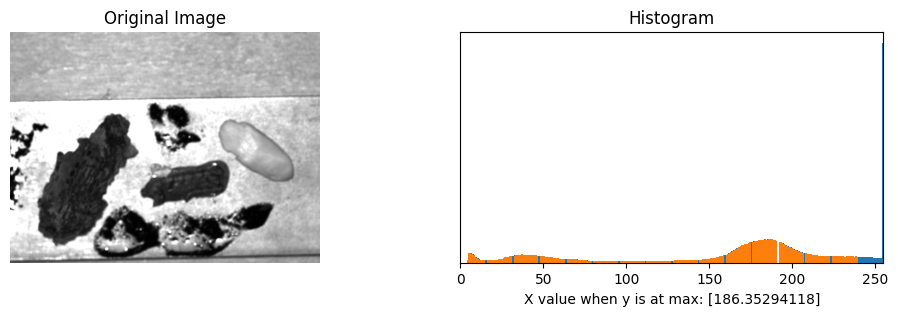

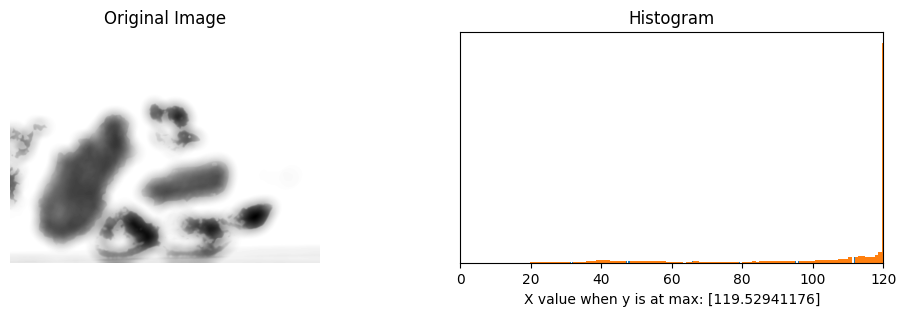

(< cv2.KeyPoint 00000264158FC960>, < cv2.KeyPoint 00000264158FC540>)


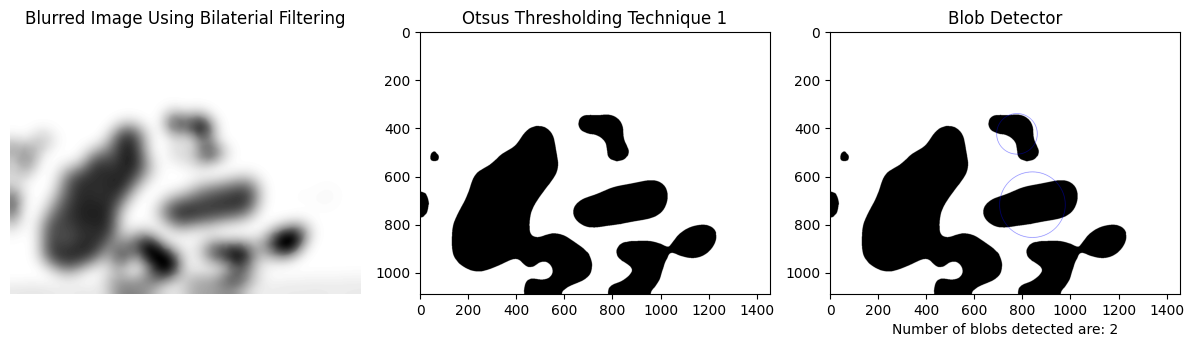

In [36]:
import glob
import os

df_list= []

all_files = "C:/Users/kn583/OneDrive - Drexel University/Code/Laternfly/Image Set/50mm_FocalLength/all zero degrees"
for images in glob.iglob(f'{all_files}/*'):
    directory, filename= os.path.split(images)
    print(filename)
    print(images)
    gray_image, blur = threshold_trunc(images)
    print(gray_image)
    xmax = show(gray_image)
    blurred_xmax= show(blur)
    blob_count = Binarization(blur, blurred_xmax)
    dff= pd.DataFrame()
    dff =results_to_dataframe(dff, filename, blob_count)
    df_list.append(dff)
final_df=pd.concat(df_list)
final_df.to_excel("output1.xlsx")
